### Purpose of this Jupyter Notebook:

#### Background:

- This notebook is for visualizing the time series data which was extracted using the Get_statistics_script_1
- Here, some basic resampling is carried out for the SWE time series data for sub-basins in the INDUS

#### How and what we are trying to achieve from this
- Visualization of SWE (10 years data): using the original time-series data for each sub-basin in Indus 
- Visualization of SWE: resampled time-series data 

NOTE: anomaly can be checked for a given year (user input year)
Also, the average can be taken 20 years data or based on user preference and availability of data
However, in this case, 12 years data from (2011-2022) were taken into account

####  Required inputs:
- .CSV files containing the basic Statistics for each sub-basin in the INDUS

#### Output:
- Resampled Statistics files to monthly interval (.csv file containing the resampled monthly Basic Statistics for selected Parameter)


### Importing python libraries

In [2]:
import glob
import xarray as xr
from datetime import datetime
import pandas as pd
import os
import numpy as np

import geopandas as gpd
import shapely
from shapely.geometry import mapping

import matplotlib.pyplot as plt
from matplotlib.pyplot import show
import matplotlib as mpl

import dateutil
from dateutil import parser
import pathlib as pl
import glob

### Reading all csv files containing the SWE statistics from fewsNET dataset


#### Option A: Read all the individual CSV files containing the time series data for each YEAR

- Using Get_Statistics_script_1: a separate statistics file were created based yearly data

In [3]:
#Parameter Name: SWE (Snow Water Equivalent)
#Statistics include the following: *along with the ID and attribute table of the shapefile
# ["min", "max", "mean", "median", "stdev", "count"]

swe_stats_2011 = pd.read_csv("SWE_2011_indus_statistics.csv")
swe_stats_2012 = pd.read_csv("SWE_2012_indus_statistics.csv")
swe_stats_2013 = pd.read_csv("SWE_2013_indus_statistics.csv")
swe_stats_2014 = pd.read_csv("SWE_2014_indus_statistics.csv")
swe_stats_2015 = pd.read_csv("SWE_2015_indus_statistics.csv")
swe_stats_2016 = pd.read_csv("SWE_2016_indus_statistics.csv")
swe_stats_2017 = pd.read_csv("SWE_2017_indus_statistics.csv")
swe_stats_2018 = pd.read_csv("SWE_2018_indus_statistics.csv")
swe_stats_2019 = pd.read_csv("SWE_2019_indus_statistics.csv")
swe_stats_2020 = pd.read_csv("SWE_2020_indus_statistics.csv")
swe_stats_2021 = pd.read_csv("SWE_2021_indus_statistics.csv")
swe_stats_2022 = pd.read_csv("SWE_2022_indus_statistics.csv")

#### Option B: In case where you have all the individual YEARLY CSV files, read them all and combine all the YEARS

- This reads the same files as in Option A but here it reads all the yearly data files and automatically combines them as a single dataframe

In [3]:
#The following code requies a file path to the files that contains the SWE statistics.
#In this case, the each file contain 1 year SWE data. Therefore, as there's 12 years data, the code below simply reads all
#the csv files within the folder and combines it together to form a 12 Years SWE Time Series dataset

file_path = pl.Path("C:/Users/sarshrestha/swe_stats_2011_to_2022/")
dfs = (pd.read_csv(p, encoding='utf8') for p in file_path.glob('*.csv'))
swe_2011_2022 = pd.concat(dfs)
swe_2011_2022

ID L1_Name      L2_Name      L3_Name  Mcode        Date  Min       Max  \
0     45   Indus  Trunk Indus  Trunk Indus    NaN  2010-10-02  NaN       NaN   
1     45   Indus  Trunk Indus  Trunk Indus    NaN  2010-10-03  NaN       NaN   
2     45   Indus  Trunk Indus  Trunk Indus    NaN  2010-10-04  NaN       NaN   
3     45   Indus  Trunk Indus  Trunk Indus    NaN  2010-10-05  NaN       NaN   
4     45   Indus  Trunk Indus  Trunk Indus    NaN  2010-10-06  NaN       NaN   
...   ..     ...          ...          ...    ...         ...  ...       ...   
5812  67   Indus  Upper Indus        Hunza  Ind06  2022-07-13  0.0  9667.900   
5813  67   Indus  Upper Indus        Hunza  Ind06  2022-07-14  0.0  9686.264   
5814  67   Indus  Upper Indus        Hunza  Ind06  2022-07-15  0.0  9699.875   
5815  67   Indus  Upper Indus        Hunza  Ind06  2022-07-16  0.0  9699.476   
5816  67   Indus  Upper Indus        Hunza  Ind06  2022-07-17  0.0  9697.950   

          Mean  Median       Std    Count  
0          NaN     NaN       NaN      NaN  
1          NaN     NaN       NaN      NaN  
2          NaN     NaN       NaN      NaN  
3          NaN     NaN       NaN      NaN  
4          NaN     NaN       NaN      NaN  
...        ...     ...       ...      ...  
5812  1865.565  30.355  2709.503  13822.0  
5813  1869.524  31.347  2713.075  13822.0  
5814  1875.209  40.283  2717.438  13822.0  
5815  1874.428  39.492  2718.248  13822.0  
5816  1871.200  30.178  2717.331  13822.0  

[80325 rows x 12 columns]

### Shapefile used to generate Statistics

- Using the original attributes from the Shapefile 
- This should be the same shapefile that was used to derive in the Basic Statistics in Script_1

In [5]:
#Shapefile used for getting Statistics using: SWE_Get_Statistics.ipynb

shp_indus = gpd.read_file(r'D:\AOI\Indus_subbasins\Indus_sub.shp', crs = "epsg:4326")
shp_indus

SHAPE_Area L1_Name      L2_Name                    L3_Name  Mcode  ID  \
0   437486.488345   Indus  Trunk Indus                Trunk Indus   None  45   
1   105740.483461   Indus      Panjnad                     Sutlej  Ind17  47   
2    19504.518515   Indus      Panjnad                       Beas  Ind16  48   
3    34859.405662   Indus      Panjnad              Trunk Panjnad   None  49   
4    30606.520298   Indus      Panjnad                       Ravi  Ind15  50   
5    44856.317288   Indus      Panjnad                     Chenab  Ind14  51   
6    15851.043097   Indus  Upper Indus                    Zanskar  Ind10  52   
7    50858.832116   Indus      Panjnad                     Jhelum  Ind13  53   
8   124888.298058   Indus  Trunk Indus                Trunk Indus   None  54   
9    17598.002492   Indus        Kabul                      Kabul   None  56   
10   10508.910421   Indus  Upper Indus                     Shingo  Ind11  57   
11   33419.073887   Indus  Upper Indus                      Shyok  Ind08  58   
12    3991.209716   Indus  Upper Indus                      Astor  Ind12  59   
13    6217.482625   Indus        Kabul  Alingar-Alishing-Nuristan  Ind02  60   
14   29823.314233   Indus        Kabul          Panjsher-Ghorband  Ind01  61   
15   14735.653324   Indus        Kabul                       Swat  Ind04  62   
16   75141.044873   Indus  Upper Indus                Upper Indus  Ind09  63   
17    7050.381108   Indus  Upper Indus                     Shigar  Ind07  64   
18   25937.687410   Indus        Kabul                      Kunar  Ind03  65   
19   13544.822212   Indus  Upper Indus                     Gilgit  Ind05  66   
20   13744.581655   Indus  Upper Indus                      Hunza  Ind06  67   

    excess_sno                                           geometry  
0          NaN  MULTIPOLYGON (((67.68004 23.80865, 67.67747 23...  
1        17.31  POLYGON ((81.22510 31.15371, 81.21941 31.15249...  
2          NaN  POLYGON ((76.03089 32.52178, 76.03457 32.52056...  
3          NaN  POLYGON ((72.14429 31.17199, 72.14953 31.16611...  
4         5.25  POLYGON ((77.07933 32.39681, 77.07442 32.39492...  
5         4.16  POLYGON ((75.66970 34.19920, 75.67260 34.19920...  
6          NaN  POLYGON ((78.16841 33.14484, 78.16350 33.14451...  
7        10.74  POLYGON ((73.99051 35.18002, 73.99386 35.17936...  
8          NaN  POLYGON ((73.38567 34.07585, 73.39248 34.07108...  
9        10.28  POLYGON ((70.38676 34.66044, 70.39055 34.65844...  
10        0.07  POLYGON ((76.61613 34.06502, 76.61077 34.06546...  
11       10.65  POLYGON ((76.48333 35.63743, 76.48255 35.63344...  
12        2.29  POLYGON ((75.24666 35.15826, 75.24298 35.15627...  
13        0.00  POLYGON ((70.54359 35.45340, 70.53968 35.45374...  
14         NaN  POLYGON ((70.26240 35.66895, 70.25782 35.66795...  
15        4.30  POLYGON ((72.73796 35.81536, 72.73394 35.81281...  
16        7.91  POLYGON ((78.36469 33.61350, 78.36134 33.60885...  
17        5.14  POLYGON ((75.72416 36.07207, 75.72606 36.06963...  
18        4.83  POLYGON ((73.66972 36.91198, 73.67062 36.90777...  
19        7.23  POLYGON ((74.04555 36.82627, 74.05158 36.82228...  
20        8.33  POLYGON ((75.72416 36.07207, 75.72115 36.07129...

#### Get the list of ID from the shapefile and Input the Start Date

- Here, we have used the same start date for all the IDs (representing each sub-basin)
- Option A (in section 4.2) was used in this notebook
- Option B (in section 4.3 - optional) is useful when user wants to input different starting dates for respective ID

#### Option A: is used in this workflow

Create a dataframe to auto-assign the same Start date to all the polygons

- This option supports the use of standard start dates for data available in Indus region (which is Oct in Year 1 until September in Year 2)

In [7]:
#Step-1: Create an empty dataframe which will contain the list of polygon ID of each sub-basin with 
# respective start date for time series data
df_indus = pd.DataFrame()

#Step-2: Obtain the list of IDs of each sub-basins and Start date
#Get the unique list of polygon ID using the input shapefile (AOI)
#List no. 1:
poly_id_arr = shp_indus["ID"].unique()
poly_id_list = poly_id_arr.tolist()
#List no. 2:
#Input the start date for all AOI (add a date column ) column
#here, the period of start date is on October for all AOI
#Hence, the same date will be used to denote the start date for all polygons
start_date = "2010-10-2"
start_date_list = [start_date] * len(poly_id_list)

#Step-3: Create a tuple using the 2 lists in Step-2
list_of_tuples = list(zip(poly_id_list, start_date_list))

#Step-4: Add the two columns from Step: 2,3 to the existing empty dataframe created in Step-1
df_indus = pd.DataFrame(list_of_tuples, columns = ["ID", "start_date"])


#### Option B: To create a dataframe using manual date inputs
- This is useful when you want to analyze different polygons with unqiue start dates

In [38]:
# #Step-1: Create an empty dataframe which has the list of ID for each sub-basin with respective start date of time series data
# df_indus = pd.DataFrame()

# #Step-2: Obtain the list of IDs and start_dates of each sub-basins
# # List no. 1:
# polygon_id = [45, 47, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67]
# # List no. 2:
# date_column = ["2010-10-2", "2010-10-2", "2010-10-2", "2010-10-2", "2010-10-2", "2010-10-2", "2010-10-2", 
#             "2010-10-2", "2010-10-2", "2010-10-2", "2010-10-2", "2010-10-2", "2010-10-2", "2010-10-2", 
#             "2010-10-2", "2010-10-2", "2010-10-2", "2010-10-2", "2010-10-2", "2010-10-2","2010-10-2"]

# #Step-3: Create a tuple using the 2 lists in Step-2
# list_of_tuples = list(zip(polygon_id, date_column))

# #Step-4: Add the two columns from Step: 2,3 to the existing empty dataframe created in Step-1
# #This will be used to create a for loop with using the Polygon ID to create aggregates for each sub basin in Indus region
# df_indus = pd.DataFrame(list_of_tuples, columns = ["ID", "start_date"])

### Visualizing original raw SWE data for a single Year 
- Parameter Used: SWE - Snow Water Equivalent
- Year: 2022
    - The time series data starts from Oct 2021 till Sept 2022

In [8]:
swe_stats_2022

ID L1_Name      L2_Name      L3_Name  Mcode        Date  Min       Max  \
0     45   Indus  Trunk Indus  Trunk Indus    NaN  2021-10-02  NaN       NaN   
1     45   Indus  Trunk Indus  Trunk Indus    NaN  2021-10-03  NaN       NaN   
2     45   Indus  Trunk Indus  Trunk Indus    NaN  2021-10-04  NaN       NaN   
3     45   Indus  Trunk Indus  Trunk Indus    NaN  2021-10-05  NaN       NaN   
4     45   Indus  Trunk Indus  Trunk Indus    NaN  2021-10-06  NaN       NaN   
...   ..     ...          ...          ...    ...         ...  ...       ...   
5812  67   Indus  Upper Indus        Hunza  Ind06  2022-07-13  0.0  9667.900   
5813  67   Indus  Upper Indus        Hunza  Ind06  2022-07-14  0.0  9686.264   
5814  67   Indus  Upper Indus        Hunza  Ind06  2022-07-15  0.0  9699.875   
5815  67   Indus  Upper Indus        Hunza  Ind06  2022-07-16  0.0  9699.476   
5816  67   Indus  Upper Indus        Hunza  Ind06  2022-07-17  0.0  9697.950   

          Mean  Median       Std    Count  
0          NaN     NaN       NaN      NaN  
1          NaN     NaN       NaN      NaN  
2          NaN     NaN       NaN      NaN  
3          NaN     NaN       NaN      NaN  
4          NaN     NaN       NaN      NaN  
...        ...     ...       ...      ...  
5812  1865.565  30.355  2709.503  13822.0  
5813  1869.524  31.347  2713.075  13822.0  
5814  1875.209  40.283  2717.438  13822.0  
5815  1874.428  39.492  2718.248  13822.0  
5816  1871.200  30.178  2717.331  13822.0  

[5817 rows x 12 columns]

In [9]:
# Get the unique list of IDs which will be used to create a loop for making time-series plots
swe_2022 = swe_stats_2022["ID"].unique()

# Convert the Datetime column from object to Pandas DateTime format
swe_stats_2022["Date"] = pd.to_datetime(swe_stats_2022["Date"])

In [10]:
#Get the minimum and maximum 'Mean' values of SWE or other selected parameter
#This will determine the min and max values of the Y-axis in SWE time series plots

amin = np.min(swe_stats_2022["Mean"])
amax = np.max(swe_stats_2022["Mean"])

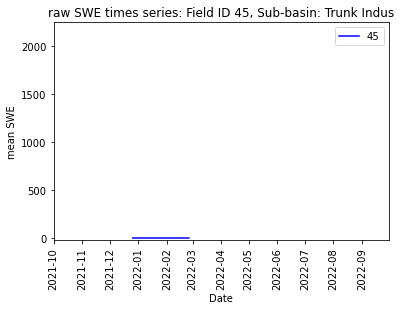

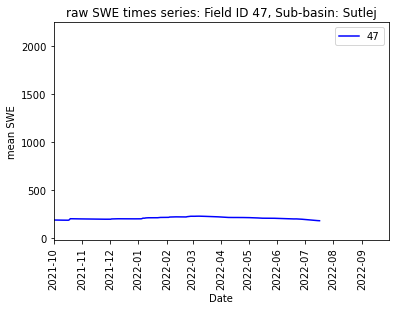

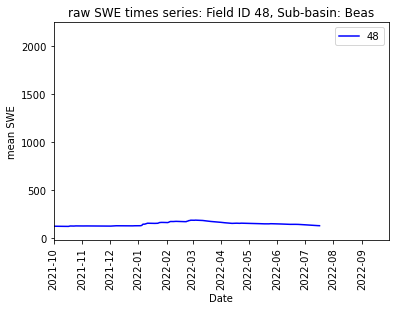

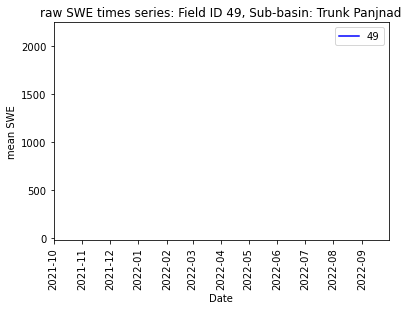

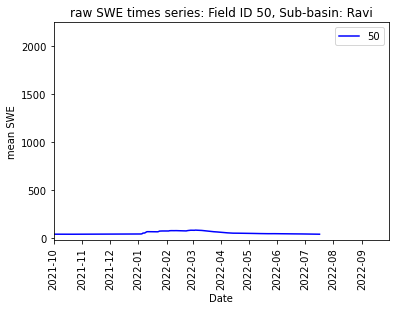

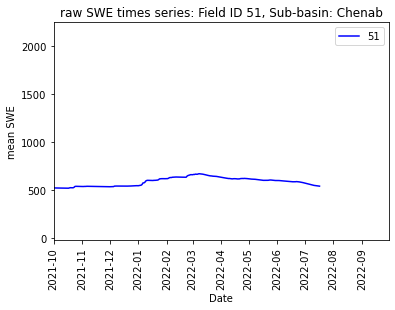

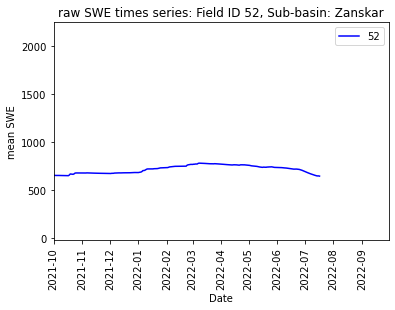

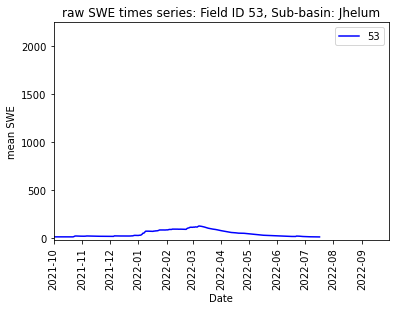

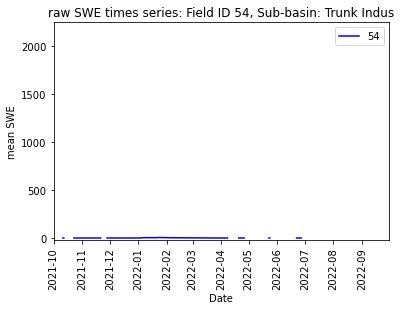

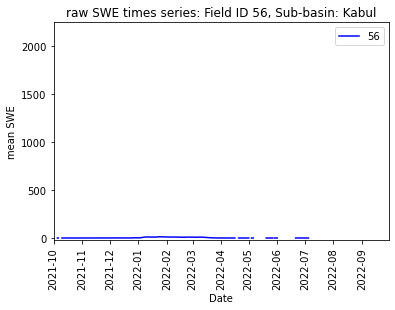

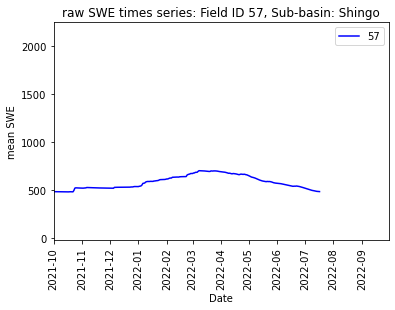

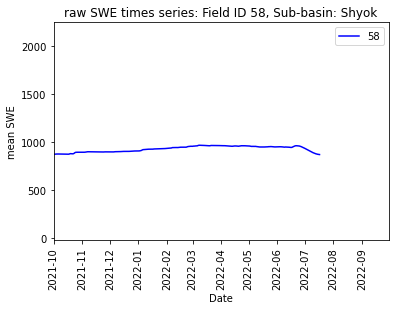

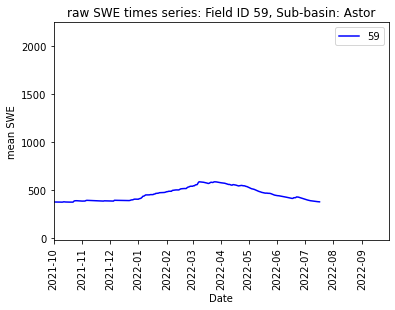

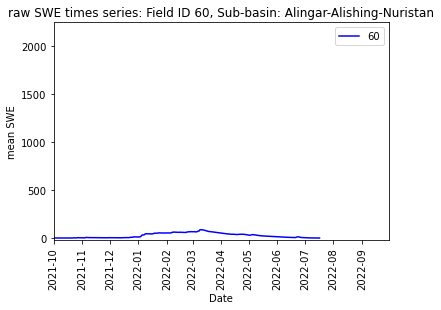

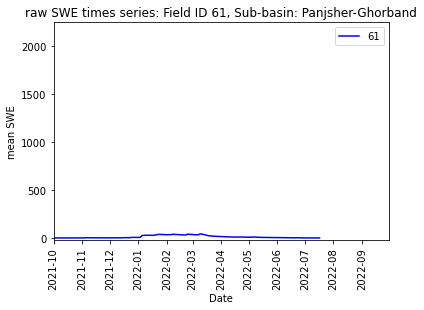

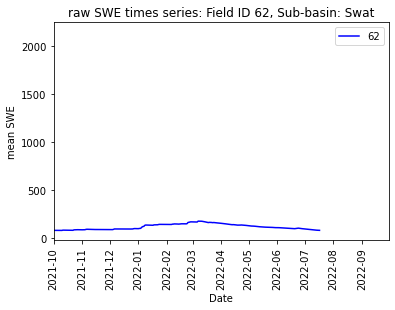

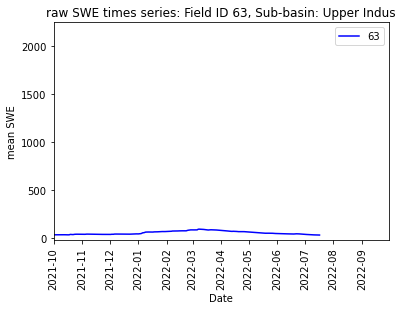

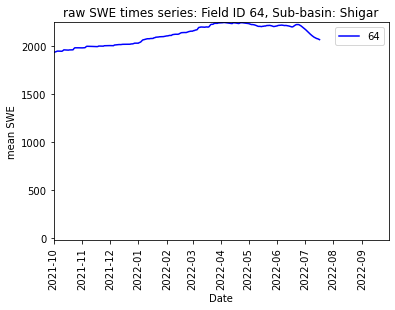

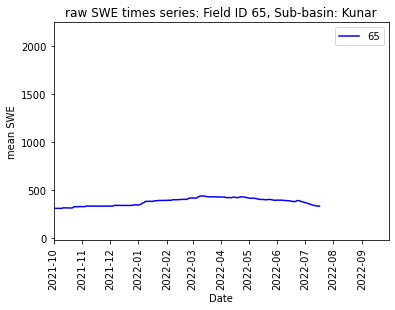

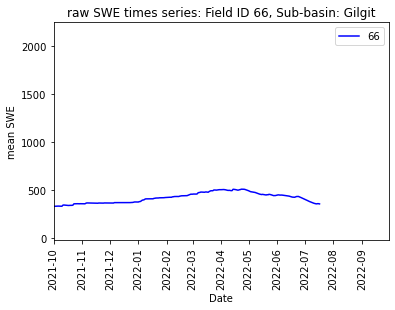

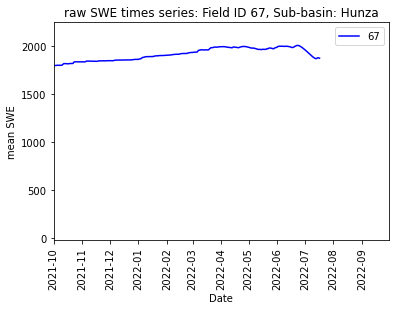

In [58]:
for i in swe_2022: 
    df_2022 = swe_stats_2022[swe_stats_2022['ID'] == i]    
    plt.plot(df_2022['Date'], df_2022["Mean"], color='blue', label=i)
    a = df_2022["L3_Name"].unique()
    plt.xlabel('Date')
    plt.xticks(rotation = 90)
    plt.title('raw SWE times series: Field ID {}'.format(i) + ', ' + "Sub-basin: " + str(a[0]))
    plt.legend()
    
    plt.xlim([pd.to_datetime("2021-10-01"), pd.to_datetime("2022-9-30")])
    plt.ylim(-20,amax)
    
    plt.ylabel('mean SWE')
    plt.show()

#### Without limits on Y-Axis
- This is to visualize the plots without using any limit on the y-axis

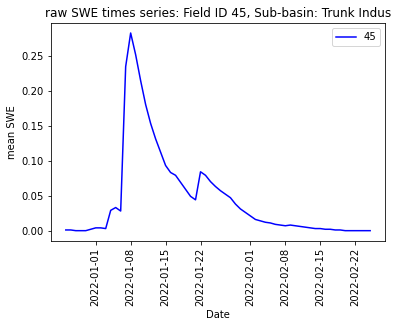

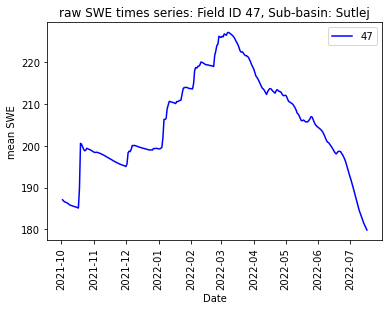

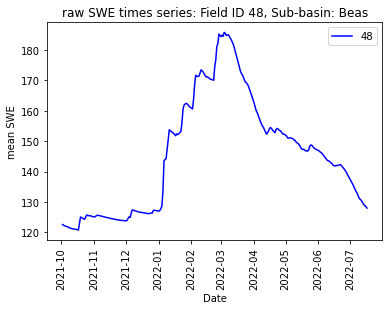

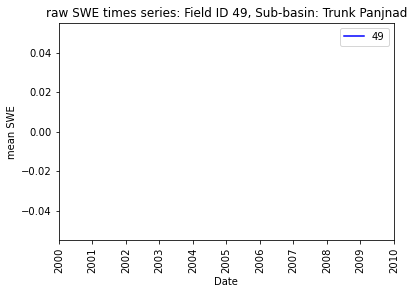

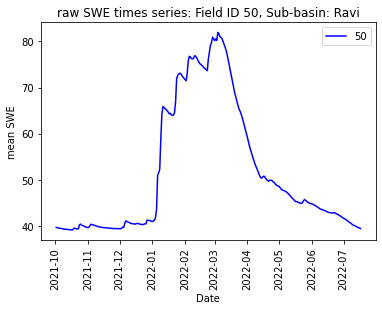

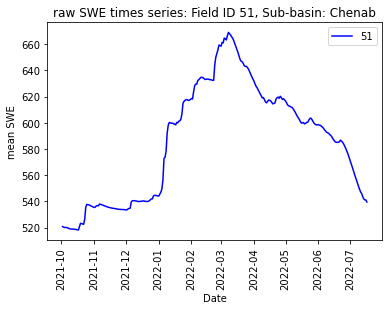

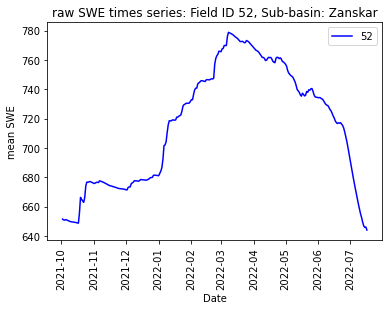

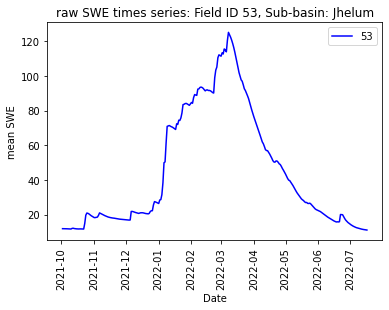

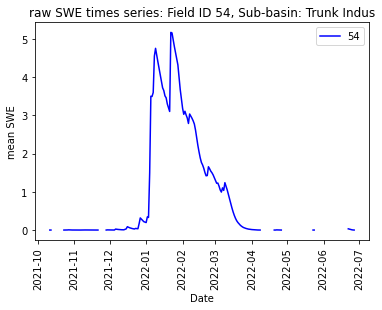

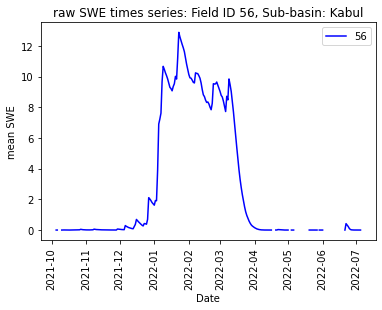

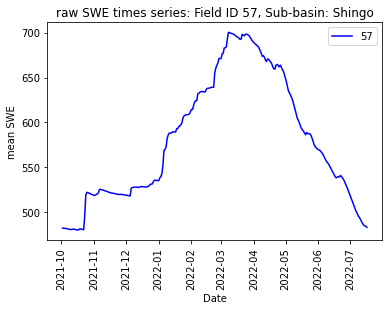

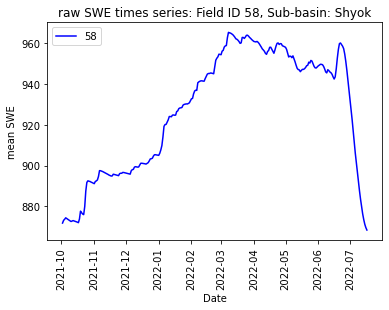

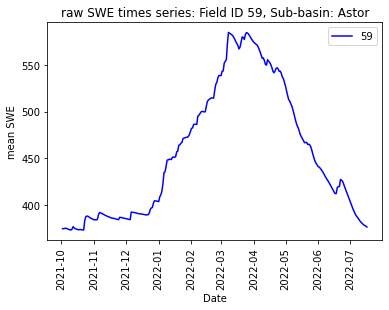

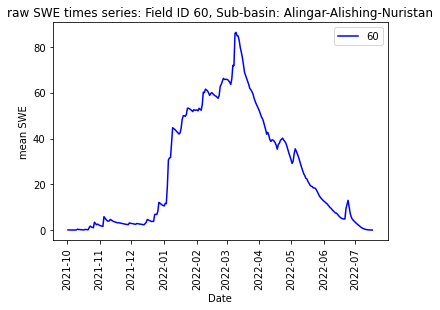

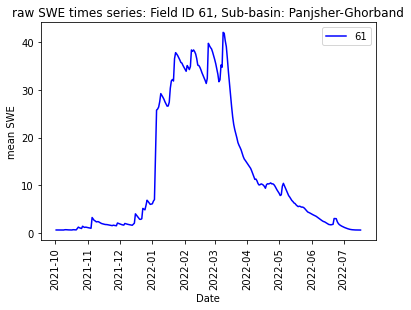

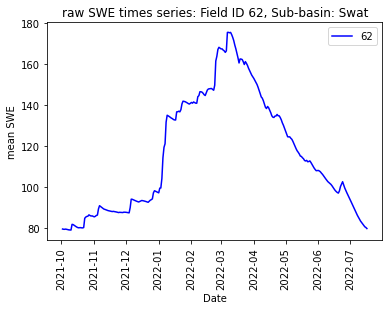

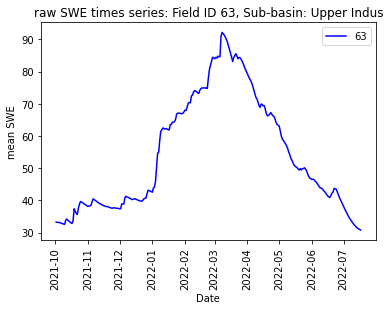

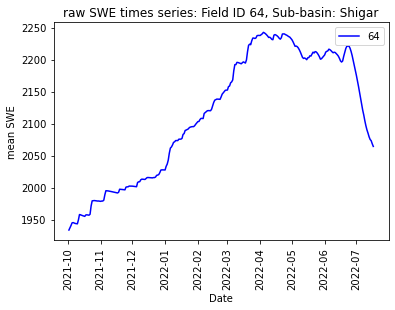

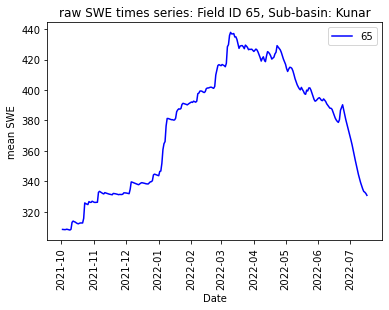

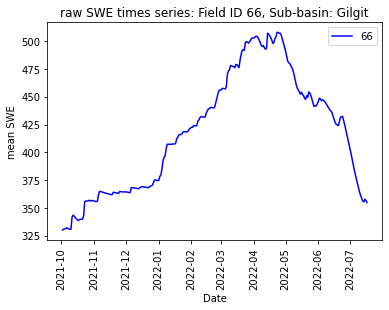

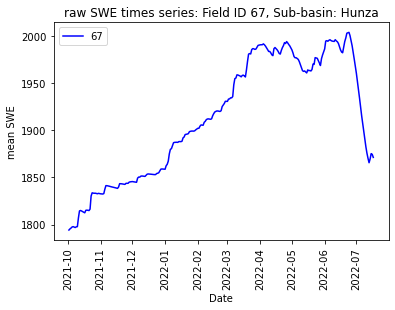

In [54]:
for i in swe_2022: 
    df_2022 = swe_stats_2022[swe_stats_2022['ID'] == i]    
    plt.plot(df_2022['Date'], df_2022["Mean"], color='blue', label=i)
    a = df_2022["L3_Name"].unique()
    plt.xlabel('Date')
    plt.xticks(rotation = 90)
    plt.title('raw SWE times series: Field ID {}'.format(i) + ', ' + "Sub-basin: " + str(a[0]))
    plt.legend()
    plt.ylabel('mean SWE')
    plt.show()

### Resampling data for all polygon IDs using one year data

In [12]:
#Create variables to store string (string that refer to column name(s) in ROI and NDVI Stats dataframe)

date_col = 'start_date'
fid_col = 'ID'

In [13]:
#Reading the original SWE statistics

#Create some empty lists to store the resampled statistics for each polygon ID
id_array_all = []
df_from_start_date_all = []

#Iterate over each ID
for index, rows in df_indus.iterrows():
    if not pd.isna(rows[date_col]):
        stda = parser.parse(rows[date_col])
    
    df_id_all = pd.DataFrame()
    df_id_all = swe_stats_2011.query("{}=={}".format(fid_col, int(rows[fid_col])))
    
    if not df_id_all.empty:
        df_id_all['Date'] = pd.to_datetime(df_id_all.loc[:,"Date"])
        df_id_all = df_id_all.set_index('Date')
        df_id_all = df_id_all.resample('1D').mean().interpolate()
        
    if not df_id_all.empty:
        df_id_start = df_id_all[df_id_all.index >= stda]
        df_id_start = df_id_start.resample('M').mean().interpolate()
    
        df_id_start['DAS'] = df_id_start.index - stda
        df_id_start['MAS'] = (df_id_start.index - stda)/31
        df_id_start['MAS'] = df_id_start['MAS'].dt.days
        
        df_from_start_date_all.append(df_id_start)
        id_array_all.append(int(rows[fid_col]))

C:\Users\sarshrestha\AppData\Local\Temp\ipykernel_35252\4201936306.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_id_all['Date'] = pd.to_datetime(df_id_all.loc[:,"Date"])
C:\Users\sarshrestha\AppData\Local\Temp\ipykernel_35252\4201936306.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_id_all['Date'] = pd.to_datetime(df_id_all.loc[:,"Date"])
C:\Users\sarshrestha\AppData\Local\Temp\ipykernel_35252\4201936306.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

C:\Users\sarshrestha\AppData\Local\Temp\ipykernel_35252\4201936306.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_id_all['Date'] = pd.to_datetime(df_id_all.loc[:,"Date"])


In [17]:
pd.concat(df_from_start_date_all)

ID  Min           Max         Mean      Median          Std  \
Date                                                                        
2010-10-31  45.0  NaN           NaN          NaN         NaN          NaN   
2010-11-30  45.0  NaN           NaN          NaN         NaN          NaN   
2010-12-31  45.0  0.0     10.767875     0.025375    0.000000     0.385500   
2011-01-31  45.0  0.0      5.383694     0.005032    0.000000     0.101629   
2011-02-28  45.0  0.0     96.421804     0.096964    0.000000     2.126000   
...          ...  ...           ...          ...         ...          ...   
2011-05-31  67.0  0.0   9776.336548  2087.721839  400.667032  2764.309677   
2011-06-30  67.0  0.0   9894.715717  2048.936517  305.133450  2803.745800   
2011-07-31  67.0  0.0   9966.415645  1932.372435   49.755935  2799.159984   
2011-08-31  67.0  0.0  10085.802242  1824.973597    0.152645  2761.122516   
2011-09-30  67.0  0.0  10200.674759  1746.273724    0.981690  2720.111483   

               Count      DAS  MAS  
Date                                
2010-10-31       NaN  29 days    0  
2010-11-30       NaN  59 days    1  
2010-12-31  398867.0  90 days    2  
2011-01-31  398867.0 121 days    3  
2011-02-28  398867.0 149 days    4  
...              ...      ...  ...  
2011-05-31   13821.0 241 days    7  
2011-06-30   13821.0 271 days    8  
2011-07-31   13821.0 302 days    9  
2011-08-31   13821.0 333 days   10  
2011-09-30   13821.0 363 days   11  

[252 rows x 9 columns]

In [15]:
# Combining all the statistics computed for each ID (each sub-basin in above cell) into a single dataframe

indus_all_stats_2010_2011 = pd.concat(df_from_start_date_all)
indus_all_stats_2010_2011 = indus_all_stats_2010_2011.reset_index()

In [19]:
# Checking resampled data for one year (2011)

swe_stats_2011

ID L1_Name      L2_Name      L3_Name  Mcode        Date  Min        Max  \
0     45   Indus  Trunk Indus  Trunk Indus    NaN  2010-10-02  NaN        NaN   
1     45   Indus  Trunk Indus  Trunk Indus    NaN  2010-10-03  NaN        NaN   
2     45   Indus  Trunk Indus  Trunk Indus    NaN  2010-10-04  NaN        NaN   
3     45   Indus  Trunk Indus  Trunk Indus    NaN  2010-10-05  NaN        NaN   
4     45   Indus  Trunk Indus  Trunk Indus    NaN  2010-10-06  NaN        NaN   
...   ..     ...          ...          ...    ...         ...  ...        ...   
7387  67   Indus  Upper Indus        Hunza  Ind06  2011-09-25  0.0  10247.496   
7388  67   Indus  Upper Indus        Hunza  Ind06  2011-09-26  0.0  10250.238   
7389  67   Indus  Upper Indus        Hunza  Ind06  2011-09-27  0.0  10258.922   
7390  67   Indus  Upper Indus        Hunza  Ind06  2011-09-28  0.0  10259.437   
7391  67   Indus  Upper Indus        Hunza  Ind06  2011-09-29  0.0  10259.345   

          Mean  Median       Std    Count  
0          NaN     NaN       NaN      NaN  
1          NaN     NaN       NaN      NaN  
2          NaN     NaN       NaN      NaN  
3          NaN     NaN       NaN      NaN  
4          NaN     NaN       NaN      NaN  
...        ...     ...       ...      ...  
7387  1741.111   1.445  2721.601  13821.0  
7388  1741.543   1.752  2722.013  13821.0  
7389  1744.372   3.903  2724.174  13821.0  
7390  1743.787   2.104  2724.332  13821.0  
7391  1743.245   1.360  2724.226  13821.0  

[7392 rows x 12 columns]

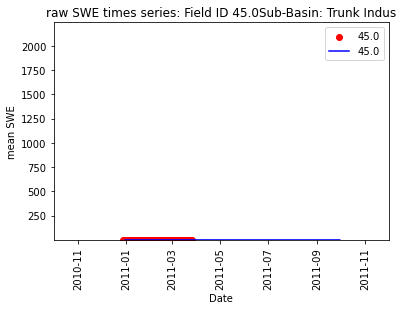

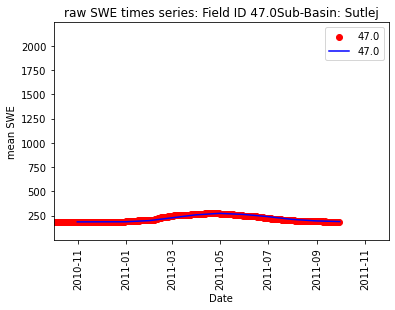

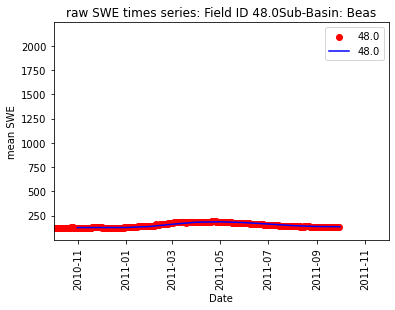

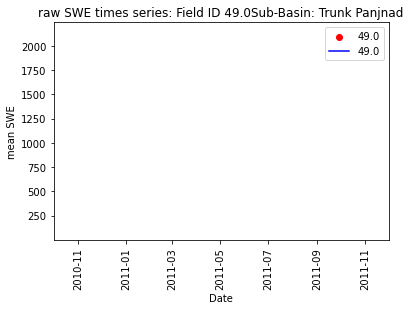

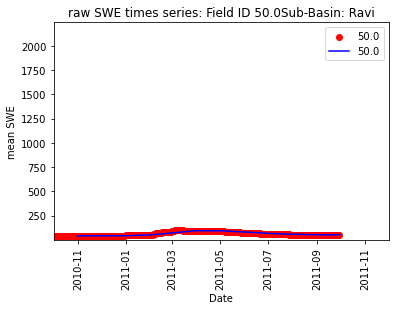

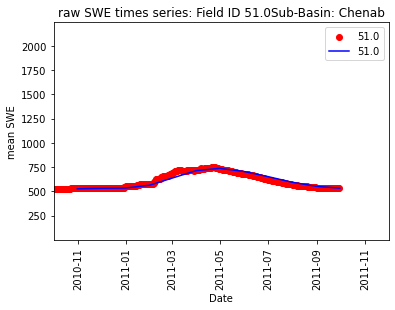

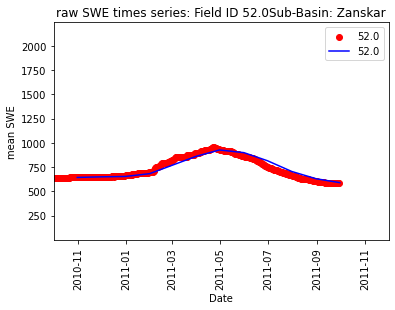

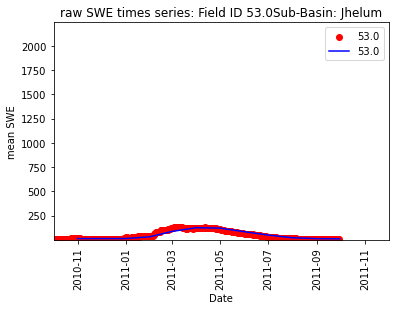

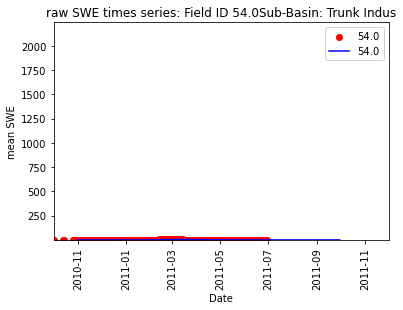

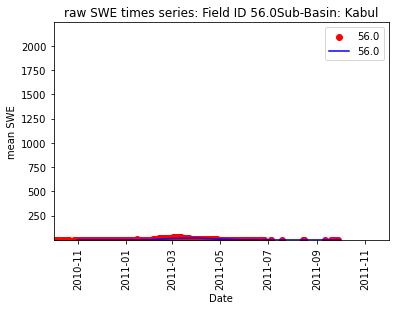

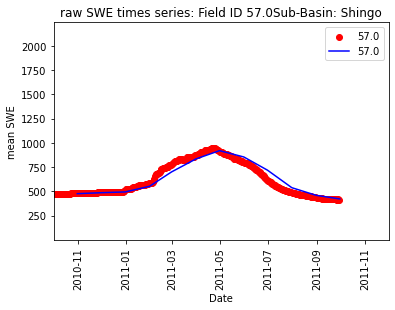

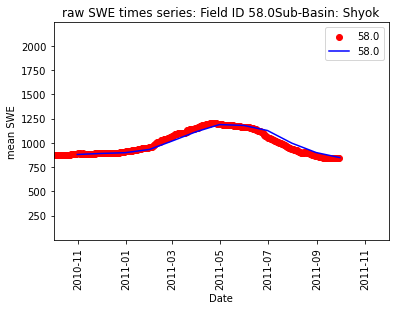

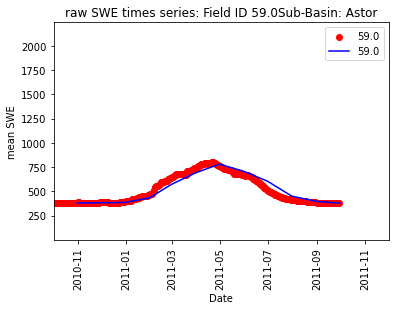

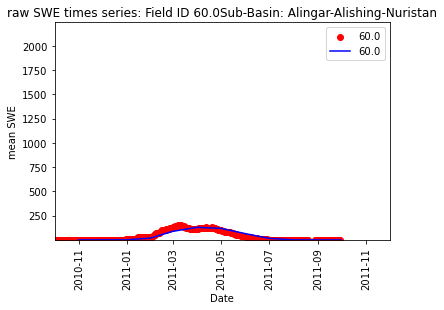

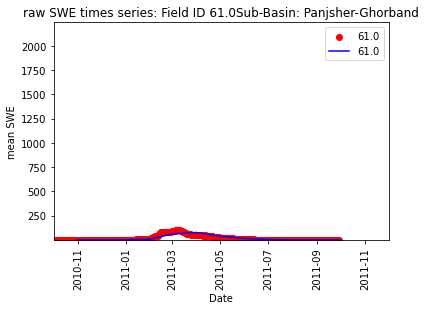

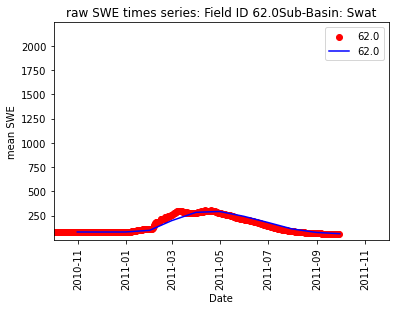

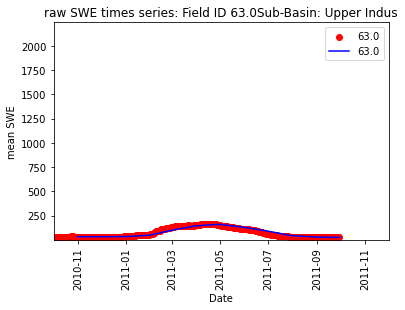

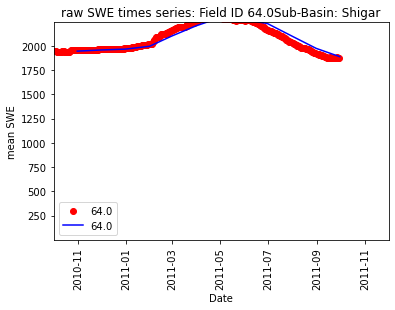

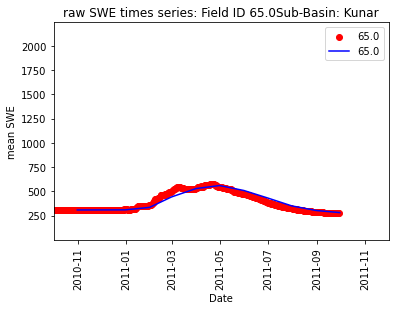

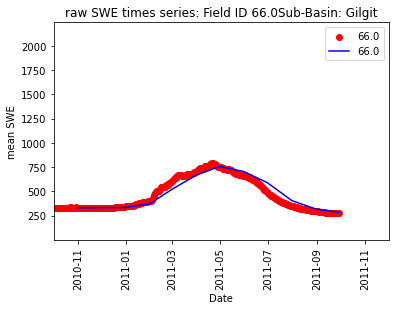

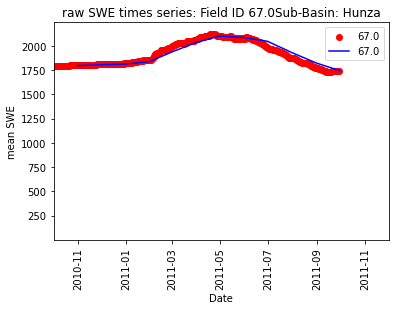

In [77]:
# Get the unique list of IDs which will be used to create a loop for making time-series plots
swe_2011_test = indus_all_stats_2010_2011["ID"].unique()

# Convert the Datetime column from object to Pandas DateTime format for original and resampled dataframes
#Original
swe_stats_2011["Date"] = pd.to_datetime(swe_stats_2011["Date"])
#Resampled
indus_all_stats_2010_2011["Date"] = pd.to_datetime(indus_all_stats_2010_2011["Date"])

# Create a for loop to plot all the time series data for SWE (Year 2011) from 2010-10-02 to 2011-09-29
for i in swe_2011_test: 
    df_2011_all = indus_all_stats_2010_2011[indus_all_stats_2010_2011['ID'] == i]    
    dfs = swe_stats_2011[swe_stats_2011["ID"]==i]
    
    #Daily mean (original data) 
    plt.scatter(dfs['Date'], dfs['Mean'], color='red', label= i)
    #Monthly mean (resampled)
    plt.plot(df_2011_all['Date'], df_2011_all["Mean"], color='blue', label=i)
    
    a = dfs["L3_Name"].unique()
                  
    plt.xlabel('Date')
    plt.xticks(rotation = 90)
    plt.xlim([pd.to_datetime("2010-10-01"), pd.to_datetime("2011-12-01")])
    plt.ylim(amin, amax)
    plt.title('raw SWE times series: Field ID {}'.format(i) + 'Sub-Basin: ' + str(a[0]))
    plt.legend()
    plt.ylabel('mean SWE')
    plt.show()

In [79]:
#Example of ONE YEAR resampled data to monthly mean aggregates from Oct-2010 to Sept-2011
df_2011_all

Date    ID       Min           Max         Mean      Median  \
240 2010-10-31  67.0  0.000000   9102.482250  1797.392550    8.955633   
241 2010-11-30  67.0  0.000000   9144.947367  1807.237933   27.389117   
242 2010-12-31  67.0  0.001839   9169.800323  1814.434935   37.247710   
243 2011-01-31  67.0  0.316613   9218.463677  1839.841500   71.368710   
244 2011-02-28  67.0  0.182554   9358.182625  1937.432911  198.080232   
245 2011-03-31  67.0  0.119000   9513.572839  2035.361629  328.921258   
246 2011-04-30  67.0  0.000000   9680.336467  2103.592633  430.231867   
247 2011-05-31  67.0  0.000000   9776.336548  2087.721839  400.667032   
248 2011-06-30  67.0  0.000000   9894.715717  2048.936517  305.133450   
249 2011-07-31  67.0  0.000000   9966.415645  1932.372435   49.755935   
250 2011-08-31  67.0  0.000000  10085.802242  1824.973597    0.152645   
251 2011-09-30  67.0  0.000000  10200.674759  1746.273724    0.981690   

             Std    Count      DAS  MAS  
240  2628.652283  13821.0  29 days    0  
241  2635.107317  13821.0  59 days    1  
242  2638.697919  13821.0  90 days    2  
243  2644.573226  13821.0 121 days    3  
244  2656.130268  13821.0 149 days    4  
245  2674.280032  13821.0 180 days    5  
246  2712.488600  13821.0 210 days    6  
247  2764.309677  13821.0 241 days    7  
248  2803.745800  13821.0 271 days    8  
249  2799.159984  13821.0 302 days    9  
250  2761.122516  13821.0 333 days   10  
251  2720.111483  13821.0 363 days   11

###  Resampling data for all polygon IDs using 10 years data

In [82]:
# Using Option B in SECTION 3.2 to import and concatenate all the individual CSV files

#The following code requies a file path to the files that contains the SWE statistics.
#In this case, the each file contain 1 year SWE data. Therefore, as there's 10-11 years data, the code below simply reads all
#the csv files and combines it together to form a 10 Years SWE Time Series dataset

file_path = pl.Path("C:/Users/sarshrestha/swe_stats_2011_to_2022/")
dfs = (pd.read_csv(p, encoding='utf8') for p in file_path.glob('*.csv'))
swe_2011_2022 = pd.concat(dfs)
swe_2011_2022

ID L1_Name      L2_Name      L3_Name  Mcode        Date  Min       Max  \
0     45   Indus  Trunk Indus  Trunk Indus    NaN  2010-10-02  NaN       NaN   
1     45   Indus  Trunk Indus  Trunk Indus    NaN  2010-10-03  NaN       NaN   
2     45   Indus  Trunk Indus  Trunk Indus    NaN  2010-10-04  NaN       NaN   
3     45   Indus  Trunk Indus  Trunk Indus    NaN  2010-10-05  NaN       NaN   
4     45   Indus  Trunk Indus  Trunk Indus    NaN  2010-10-06  NaN       NaN   
...   ..     ...          ...          ...    ...         ...  ...       ...   
5812  67   Indus  Upper Indus        Hunza  Ind06  2022-07-13  0.0  9667.900   
5813  67   Indus  Upper Indus        Hunza  Ind06  2022-07-14  0.0  9686.264   
5814  67   Indus  Upper Indus        Hunza  Ind06  2022-07-15  0.0  9699.875   
5815  67   Indus  Upper Indus        Hunza  Ind06  2022-07-16  0.0  9699.476   
5816  67   Indus  Upper Indus        Hunza  Ind06  2022-07-17  0.0  9697.950   

          Mean  Median       Std    Count  
0          NaN     NaN       NaN      NaN  
1          NaN     NaN       NaN      NaN  
2          NaN     NaN       NaN      NaN  
3          NaN     NaN       NaN      NaN  
4          NaN     NaN       NaN      NaN  
...        ...     ...       ...      ...  
5812  1865.565  30.355  2709.503  13822.0  
5813  1869.524  31.347  2713.075  13822.0  
5814  1875.209  40.283  2717.438  13822.0  
5815  1874.428  39.492  2718.248  13822.0  
5816  1871.200  30.178  2717.331  13822.0  

[80325 rows x 12 columns]

In [20]:
#Create variables to store string (string that refer to column name(s) in ROI and NDVI Stats dataframe)

date_col = 'start_date'
fid_col = 'ID'

In [21]:
id_array_final = []
df_from_start_date_final = []

for index, rows in df_indus.iterrows():
    if not pd.isna(rows[date_col]):
        stda = parser.parse(rows[date_col])
    
    df_id_final = pd.DataFrame()
    df_id_final = swe_2011_2022.query("{}=={}".format(fid_col, int(rows[fid_col])))
    
    if not df_id_final.empty:
        df_id_final['Date'] = pd.to_datetime(df_id_final.loc[:,"Date"])
        df_id_final = df_id_final.set_index('Date')
        df_id_final = df_id_final.resample('1D').mean().interpolate()
        
    if not df_id_final.empty:
        df_id_start = df_id_final[df_id_final.index >= stda]
        df_id_start = df_id_start.resample('M').mean().interpolate()
    
        df_id_start['DAS'] = df_id_start.index - stda
        df_id_start['MAS'] = (df_id_start.index - stda)/31
        df_id_start['MAS'] = df_id_start['MAS'].dt.days
        
        df_from_start_date_final.append(df_id_start)
        id_array_final.append(int(rows[fid_col]))

C:\Users\sarshrestha\AppData\Local\Temp\ipykernel_35252\1619599395.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_id_final['Date'] = pd.to_datetime(df_id_final.loc[:,"Date"])
C:\Users\sarshrestha\AppData\Local\Temp\ipykernel_35252\1619599395.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_id_final['Date'] = pd.to_datetime(df_id_final.loc[:,"Date"])
C:\Users\sarshrestha\AppData\Local\Temp\ipykernel_35252\1619599395.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [22]:
# Combining all the statistics computed for each ID (each sub-basin in above cell) into a single dataframe
swe_monthly_stats_2011_2022 = pd.concat(df_from_start_date_final)

# Index resetting
swe_monthly_stats_2011_2022 = swe_monthly_stats_2011_2022.reset_index()
swe_monthly_stats_2011_2022

Date    ID       Min          Max         Mean      Median  \
0    2010-10-31  45.0       NaN          NaN          NaN         NaN   
1    2010-11-30  45.0       NaN          NaN          NaN         NaN   
2    2010-12-31  45.0  0.000000    10.767875     0.025375    0.000000   
3    2011-01-31  45.0  0.000000     5.383694     0.005032    0.000000   
4    2011-02-28  45.0  0.000000    96.421804     0.096964    0.000000   
...         ...   ...       ...          ...          ...         ...   
2977 2022-03-31  67.0  0.022548  9396.268774  1963.062306  222.903290   
2978 2022-04-30  67.0  0.000000  9496.031800  1987.128517  267.014900   
2979 2022-05-31  67.0  0.000000  9568.510823  1971.203081  259.071839   
2980 2022-06-30  67.0  0.000000  9686.035083  1991.724483  288.648867   
2981 2022-07-31  67.0  0.000000  9687.375353  1900.485294  102.654529   

              Std     Count       DAS  MAS  
0             NaN       NaN   29 days    0  
1             NaN       NaN   59 days    1  
2        0.385500  398867.0   90 days    2  
3        0.101629  398867.0  121 days    3  
4        2.126000  398867.0  149 days    4  
...           ...       ...       ...  ...  
2977  2656.352968   13822.0 4198 days  135  
2978  2675.597050   13822.0 4228 days  136  
2979  2705.533742   13822.0 4259 days  137  
2980  2742.995950   13822.0 4289 days  138  
2981  2724.635824   13822.0 4320 days  139  

[2982 rows x 10 columns]

In [110]:
# Enter the path to save your statistics file:
path = "C:\\Users\\sarshrestha\\out_test_folder\\"

# Writing the dataframe to CSV file in your assigned path and filename:
swe_monthly_stats_2011_2022.to_csv(path + "Final_stats_print_check_2011_2022.csv", date_format='%Y-%m-%d')

# Saving the file to default location:
# swe_monthly_stats_2011_2022.to_csv("Final_stats_print_check_2011_2022.csv", date_format='%Y-%m-%d')

#### Plotting without limits in y-axis

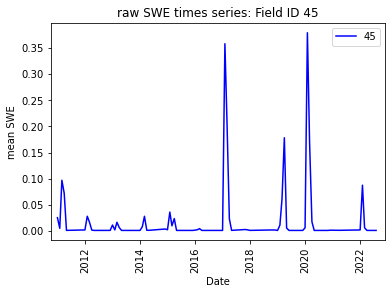

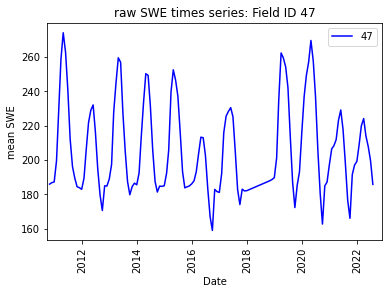

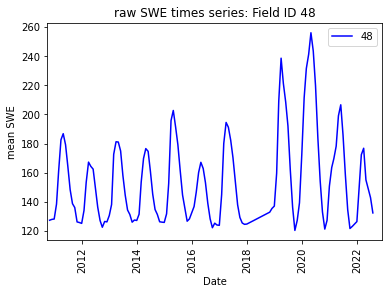

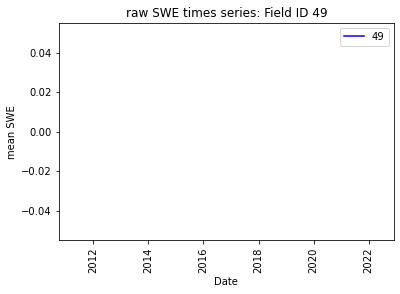

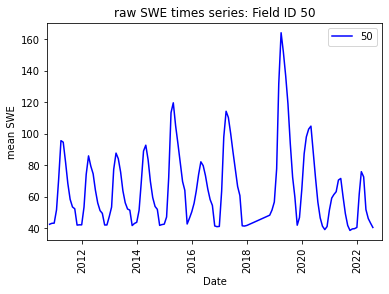

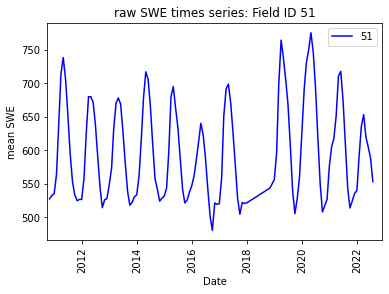

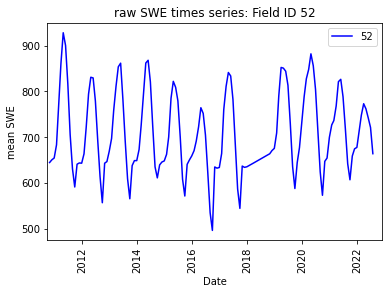

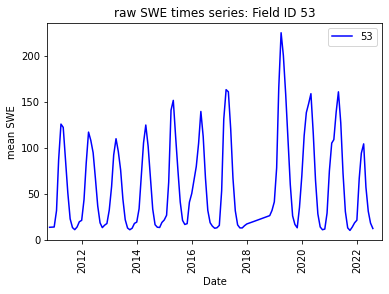

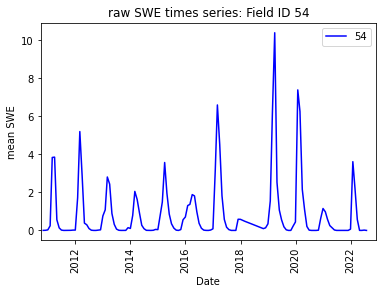

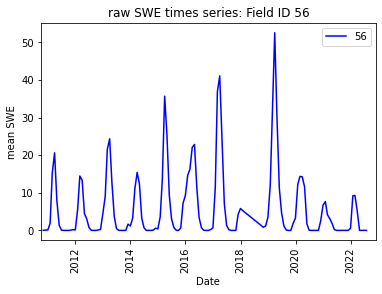

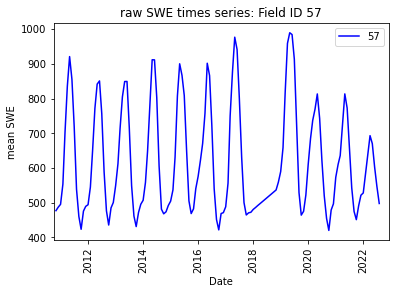

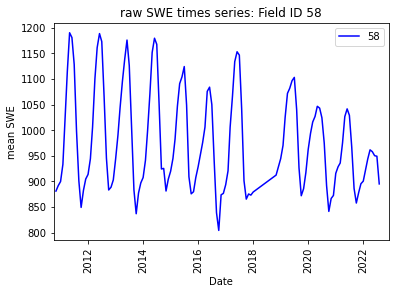

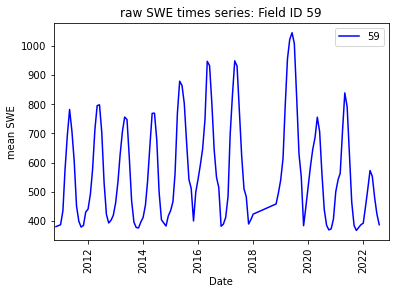

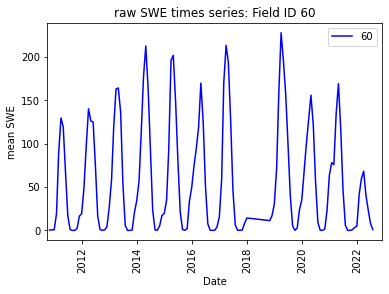

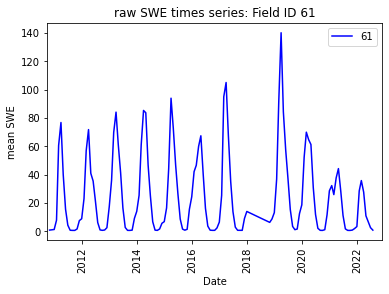

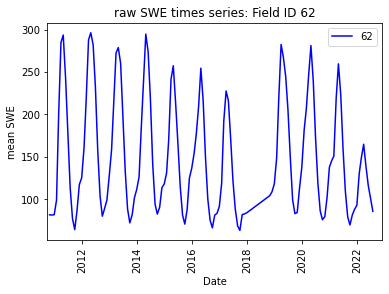

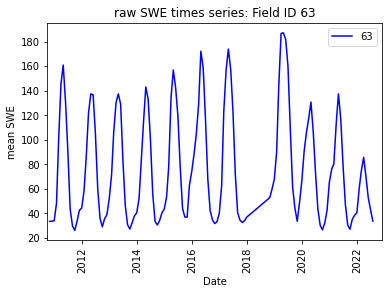

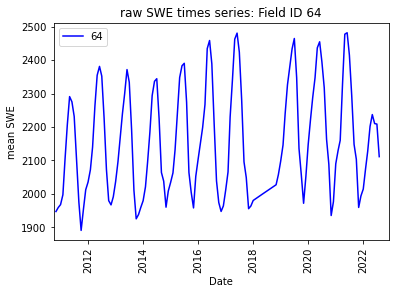

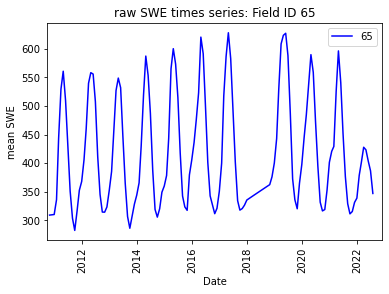

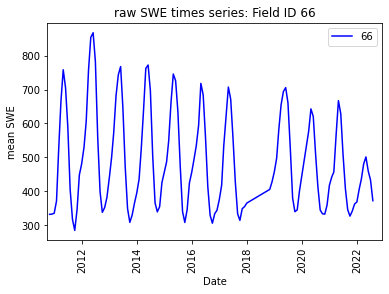

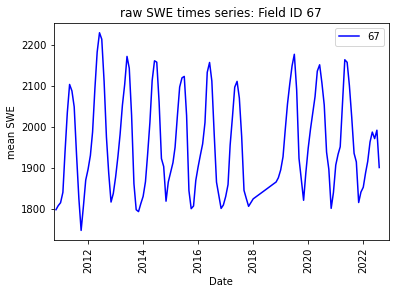

In [67]:
# Get the unique list of IDs which will be used to create a loop for making time-series plots
swe_2011_22 = df_indus["ID"].unique()  #df_indus contains the array of ID and Start_date columns

# Convert the Datetime column from object to Pandas DateTime format
swe_monthly_stats_2011_2022["Date"] = pd.to_datetime(swe_monthly_stats_2011_2022["Date"])

# Create a for loop to plot all the time series data for SWE (Year 2011) from 2010-10-02 to 2011-09-29
for i in swe_2011_22: 
    df_2011_all = swe_monthly_stats_2011_2022[swe_monthly_stats_2011_2022['ID'] == i]    
    plt.plot(df_2011_all['Date'], df_2011_all["Mean"], color='blue', label=i)
    plt.xlabel('Date')
    plt.xticks(rotation = 90)
    plt.xlim([pd.to_datetime("2010-10-01"), pd.to_datetime("2022-12-01")])
    plt.title('raw SWE times series: Field ID {}'.format(i))
    plt.legend()
    plt.ylabel('mean SWE')
    plt.show()

#### Plotting with limits in y-axis by extracting the min and max values for Mean SWE of all sub-basins (IDs)

In [118]:
#Get y axis limits, compute the min and max y values for plots
amin = np.min(swe_monthly_stats_2011_2022["Mean"])
amax = np.max(swe_monthly_stats_2011_2022["Mean"])
# print(amin)
# print(amax)

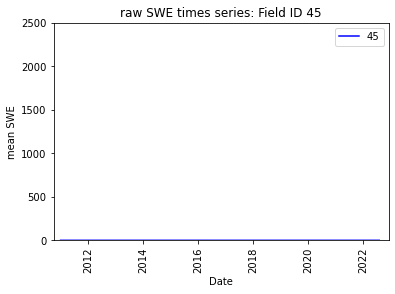

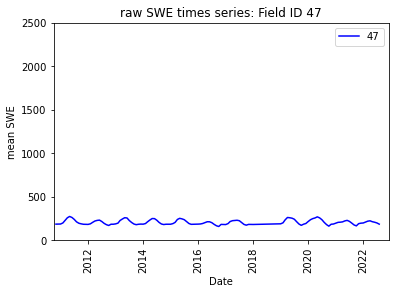

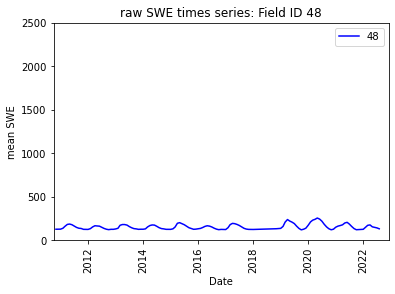

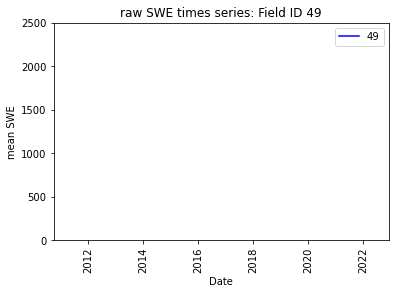

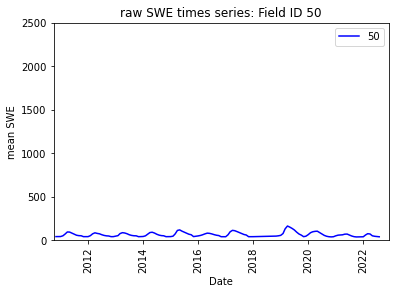

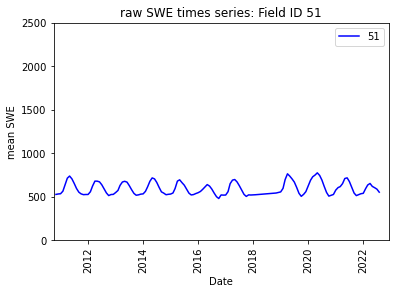

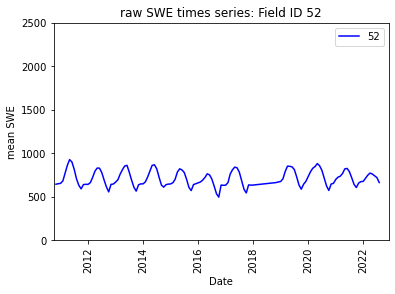

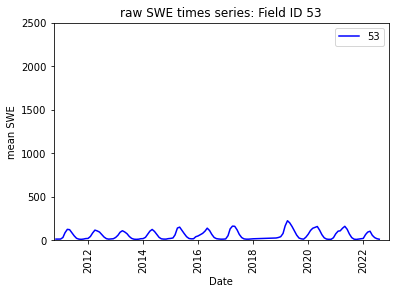

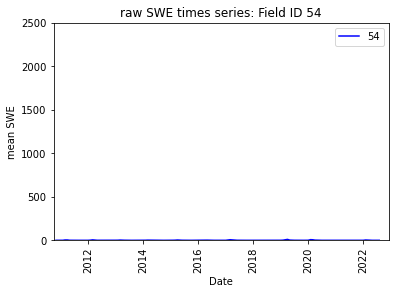

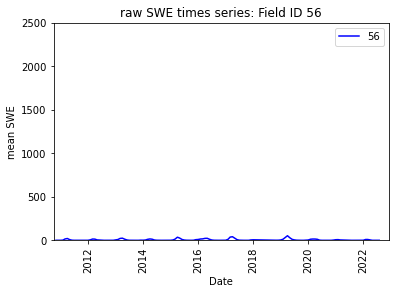

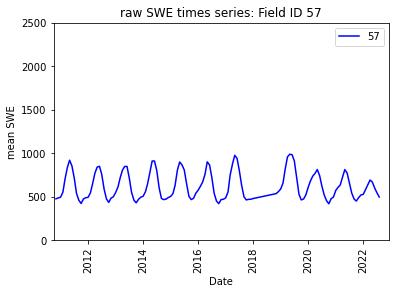

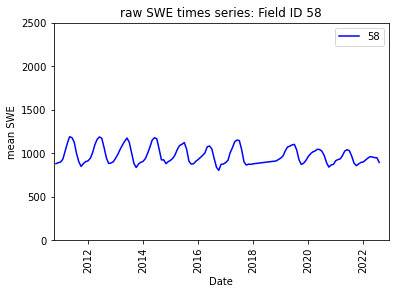

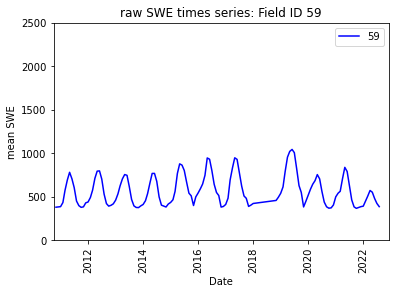

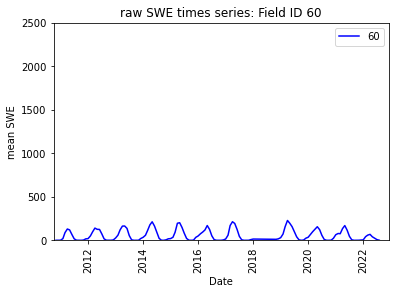

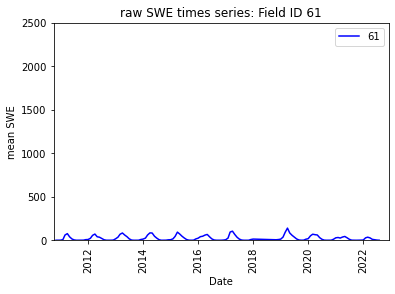

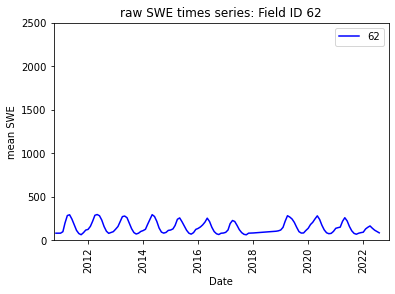

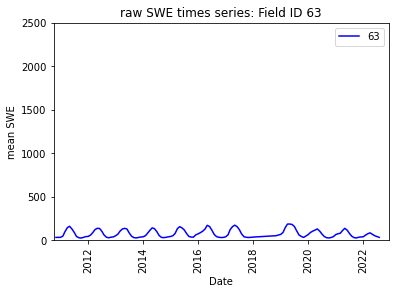

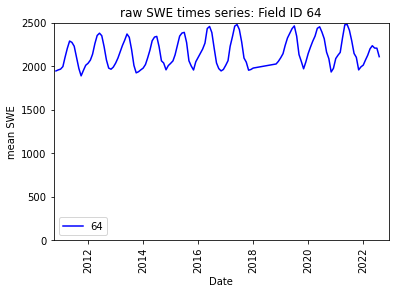

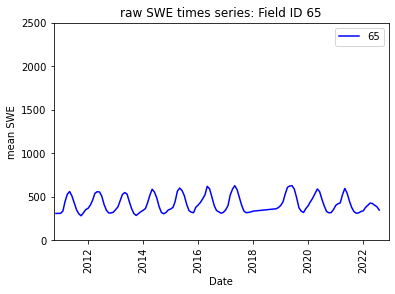

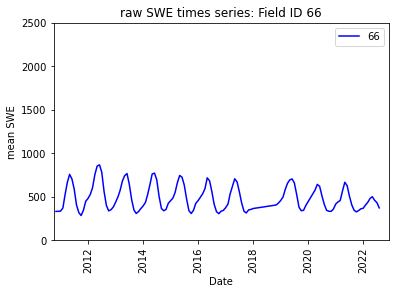

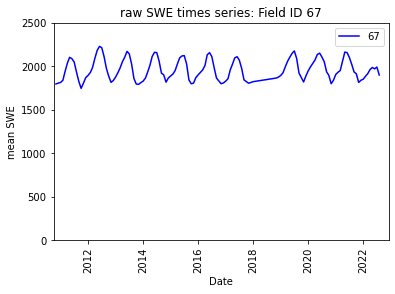

In [116]:
# Get the unique list of IDs which will be used to create a loop for making time-series plots
swe_2011_22 = df_indus["ID"].unique()  #df_indus contains the array of ID and Start_date columns

# Convert the Datetime column from object to Pandas DateTime format
swe_monthly_stats_2011_2022["Date"] = pd.to_datetime(swe_monthly_stats_2011_2022["Date"])

# Create a for loop to plot all the time series data for SWE (Year 2011) from 2010-10-02 to 2011-09-29
for i in swe_2011_22: 
    df_2011_all = swe_monthly_stats_2011_2022[swe_monthly_stats_2011_2022['ID'] == i]    
    plt.plot(df_2011_all['Date'], df_2011_all["Mean"], color='blue', label=i)
    plt.xlabel('Date')
    plt.xticks(rotation = 90)
    plt.xlim([pd.to_datetime("2010-10-01"), pd.to_datetime("2022-12-01")])
    plt.title('raw SWE times series: Field ID {}'.format(i))
    plt.legend()
    plt.ylim(0,2500)
    plt.ylabel('mean SWE')
    plt.show()

#### Plotting the 10 year time series (raw vs resampled)

In [58]:
#Daily statistics (RAW)
swe_2011_2022

ID L1_Name      L2_Name      L3_Name  Mcode        Date  Min       Max  \
0     45   Indus  Trunk Indus  Trunk Indus    NaN  2010-10-02  NaN       NaN   
1     45   Indus  Trunk Indus  Trunk Indus    NaN  2010-10-03  NaN       NaN   
2     45   Indus  Trunk Indus  Trunk Indus    NaN  2010-10-04  NaN       NaN   
3     45   Indus  Trunk Indus  Trunk Indus    NaN  2010-10-05  NaN       NaN   
4     45   Indus  Trunk Indus  Trunk Indus    NaN  2010-10-06  NaN       NaN   
...   ..     ...          ...          ...    ...         ...  ...       ...   
5812  67   Indus  Upper Indus        Hunza  Ind06  2022-07-13  0.0  9667.900   
5813  67   Indus  Upper Indus        Hunza  Ind06  2022-07-14  0.0  9686.264   
5814  67   Indus  Upper Indus        Hunza  Ind06  2022-07-15  0.0  9699.875   
5815  67   Indus  Upper Indus        Hunza  Ind06  2022-07-16  0.0  9699.476   
5816  67   Indus  Upper Indus        Hunza  Ind06  2022-07-17  0.0  9697.950   

          Mean  Median       Std    Count  
0          NaN     NaN       NaN      NaN  
1          NaN     NaN       NaN      NaN  
2          NaN     NaN       NaN      NaN  
3          NaN     NaN       NaN      NaN  
4          NaN     NaN       NaN      NaN  
...        ...     ...       ...      ...  
5812  1865.565  30.355  2709.503  13822.0  
5813  1869.524  31.347  2713.075  13822.0  
5814  1875.209  40.283  2717.438  13822.0  
5815  1874.428  39.492  2718.248  13822.0  
5816  1871.200  30.178  2717.331  13822.0  

[80325 rows x 12 columns]

In [62]:
#Monthly statistics (Resampled)
swe_monthly_stats_2011_2022

Date    ID       Min          Max         Mean      Median  \
0    2010-10-31  45.0       NaN          NaN          NaN         NaN   
1    2010-11-30  45.0       NaN          NaN          NaN         NaN   
2    2010-12-31  45.0  0.000000    10.767875     0.025375    0.000000   
3    2011-01-31  45.0  0.000000     5.383694     0.005032    0.000000   
4    2011-02-28  45.0  0.000000    96.421804     0.096964    0.000000   
...         ...   ...       ...          ...          ...         ...   
2977 2022-03-31  67.0  0.022548  9396.268774  1963.062306  222.903290   
2978 2022-04-30  67.0  0.000000  9496.031800  1987.128517  267.014900   
2979 2022-05-31  67.0  0.000000  9568.510823  1971.203081  259.071839   
2980 2022-06-30  67.0  0.000000  9686.035083  1991.724483  288.648867   
2981 2022-07-31  67.0  0.000000  9687.375353  1900.485294  102.654529   

              Std     Count       DAS  MAS  
0             NaN       NaN   29 days    0  
1             NaN       NaN   59 days    1  
2        0.385500  398867.0   90 days    2  
3        0.101629  398867.0  121 days    3  
4        2.126000  398867.0  149 days    4  
...           ...       ...       ...  ...  
2977  2656.352968   13822.0 4198 days  135  
2978  2675.597050   13822.0 4228 days  136  
2979  2705.533742   13822.0 4259 days  137  
2980  2742.995950   13822.0 4289 days  138  
2981  2724.635824   13822.0 4320 days  139  

[2982 rows x 10 columns]

In [69]:
# Convert the Datetime column from object to Pandas DateTime format
swe_2011_2022["Date"] = pd.to_datetime(swe_2011_2022["Date"])


dtype('<M8[ns]')

##### Plots without y-lim

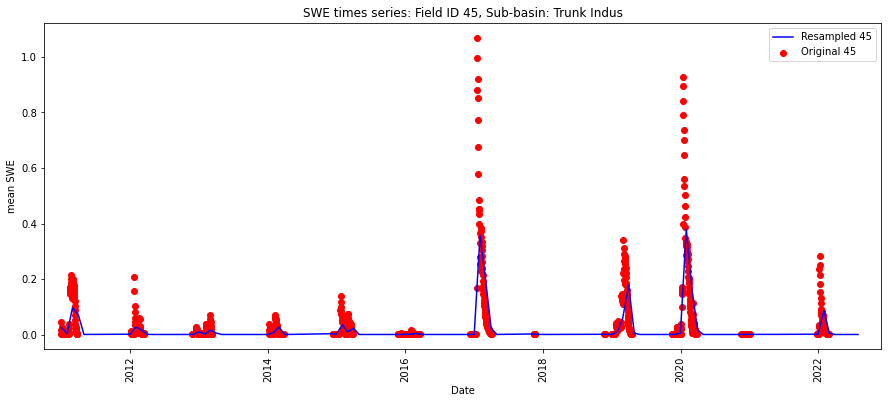

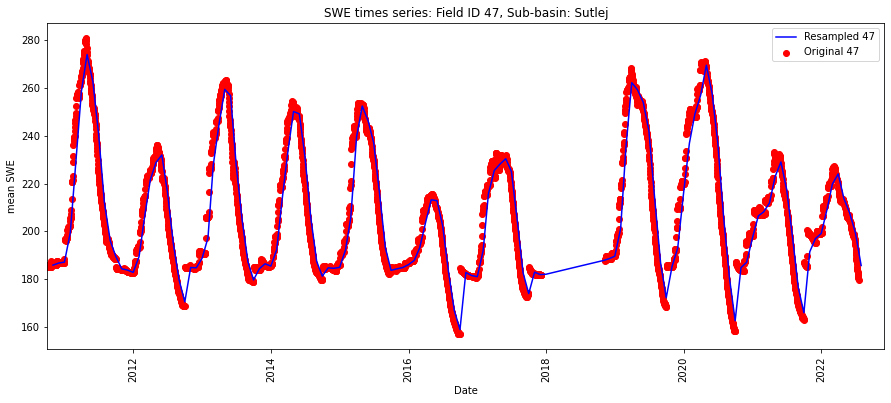

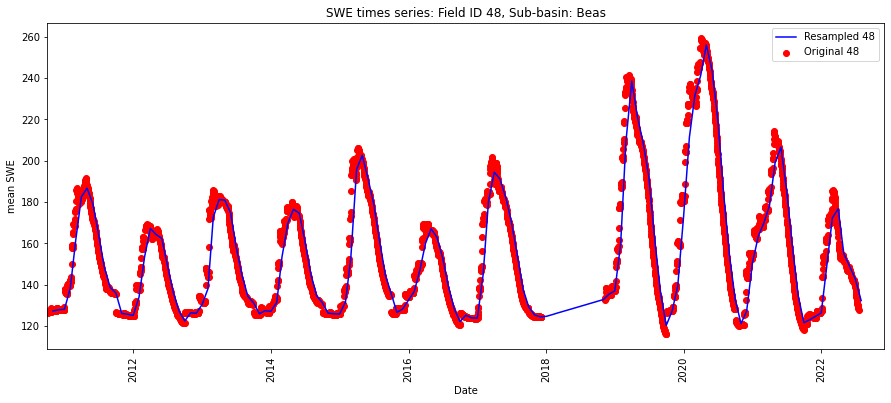

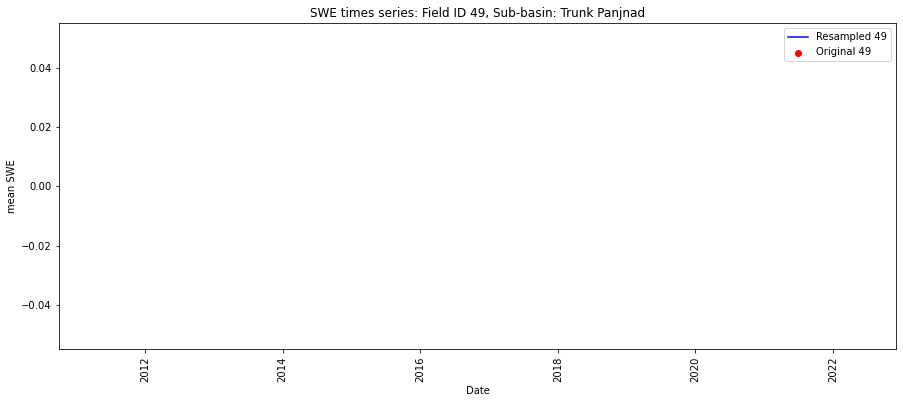

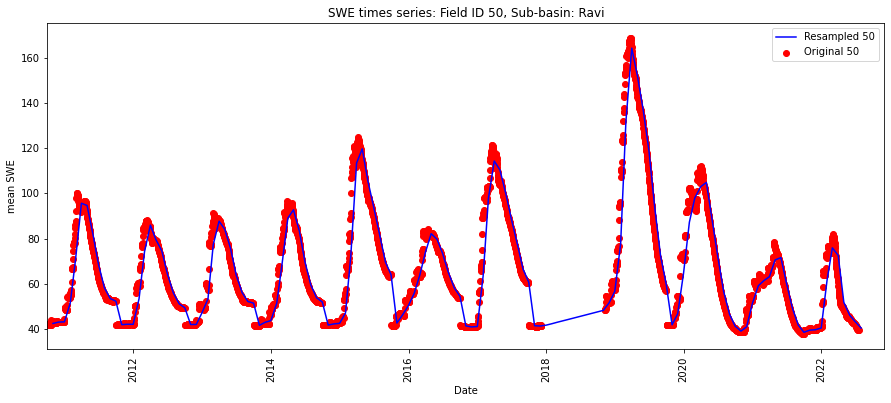

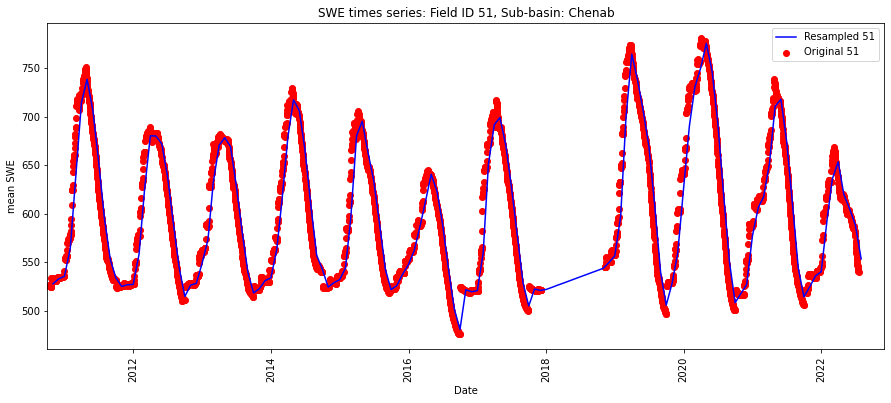

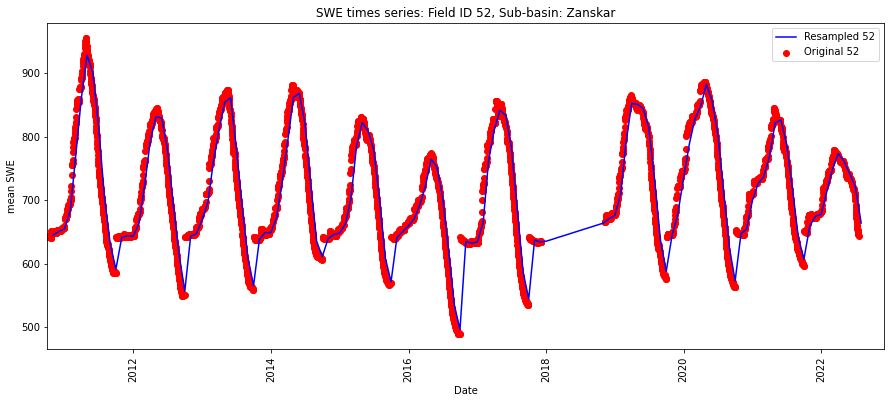

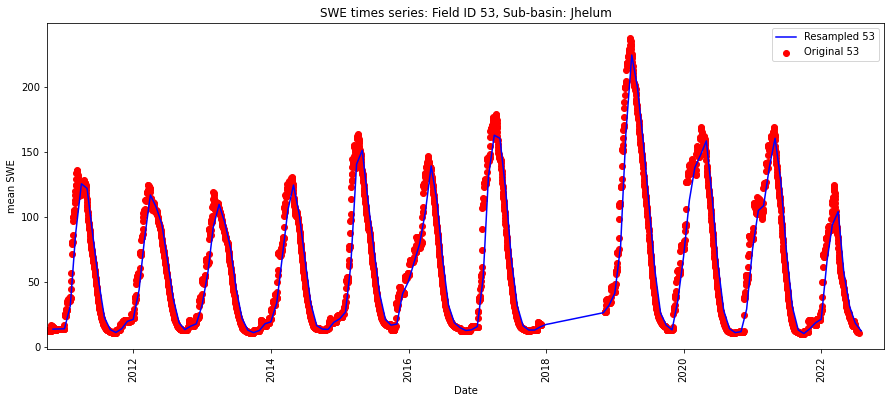

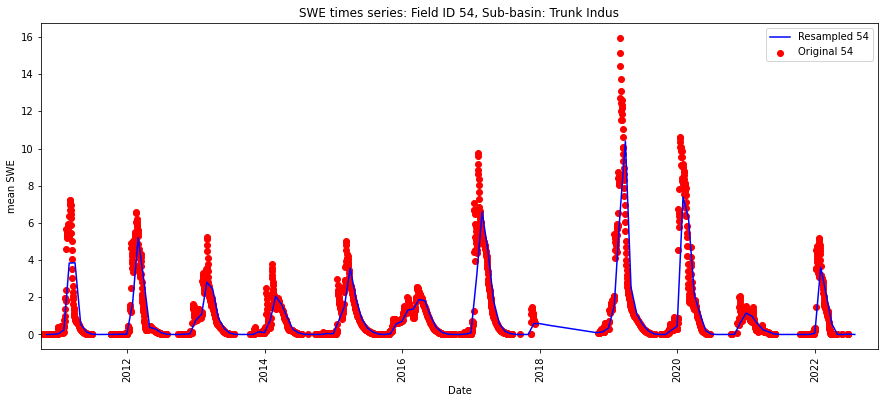

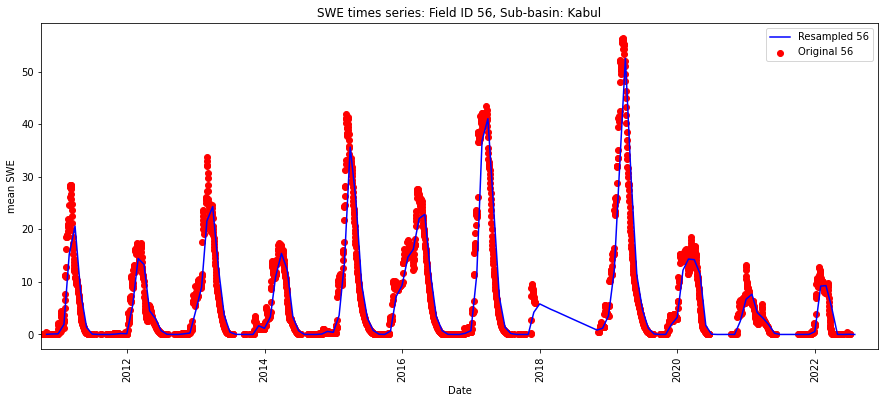

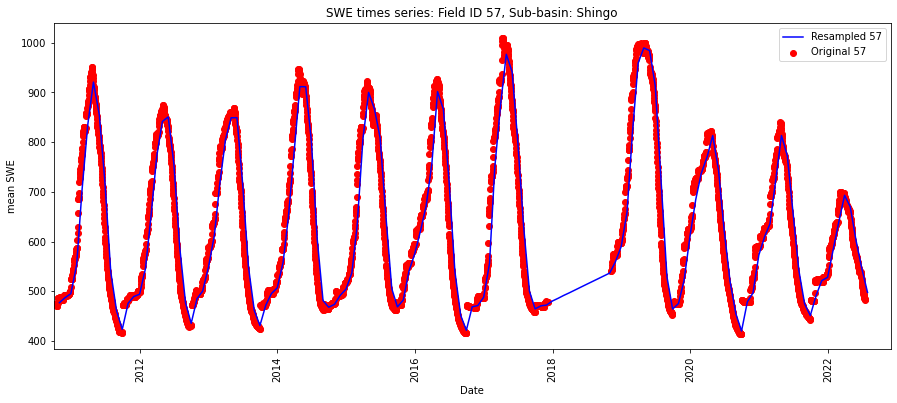

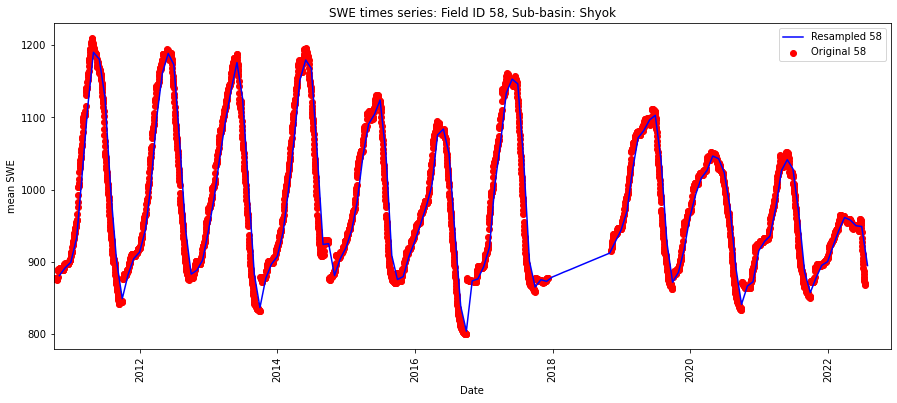

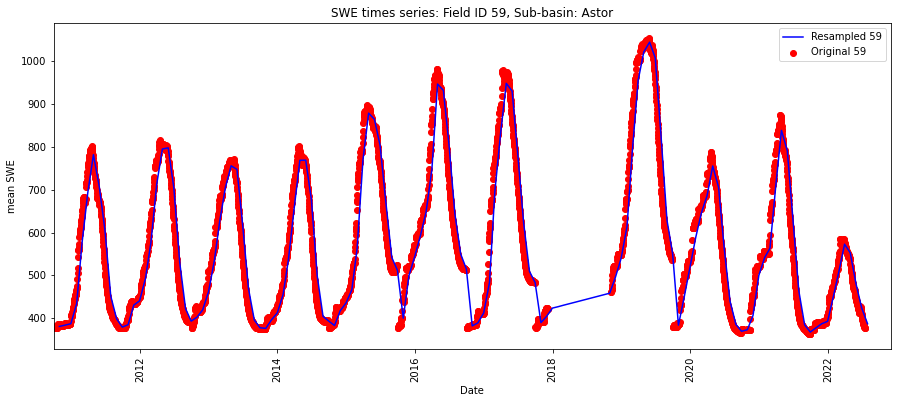

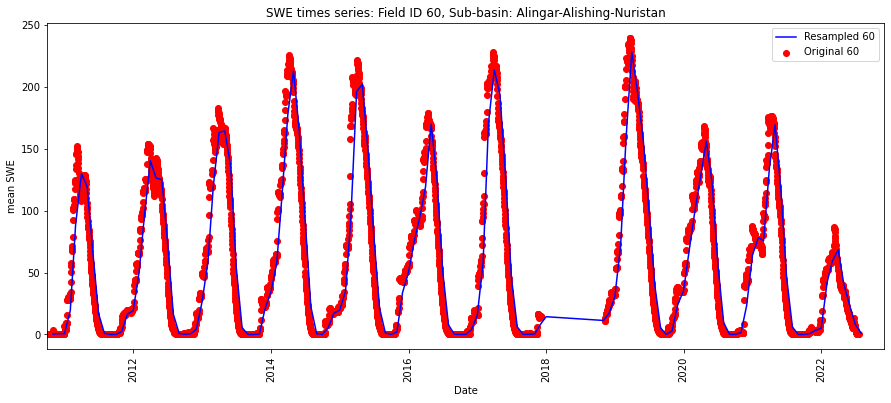

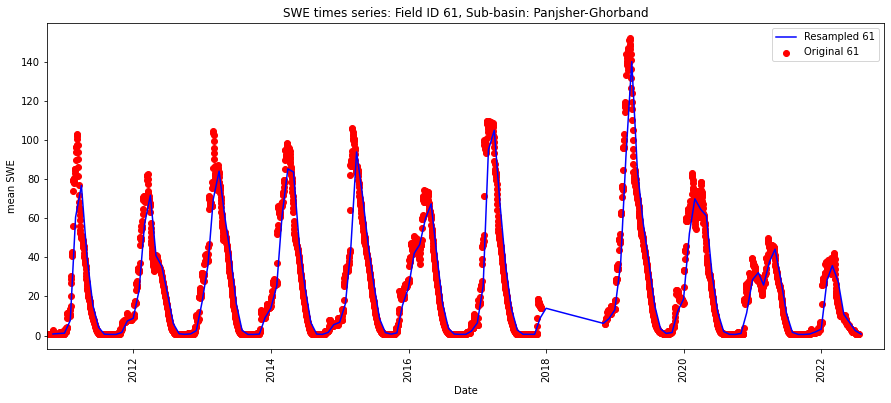

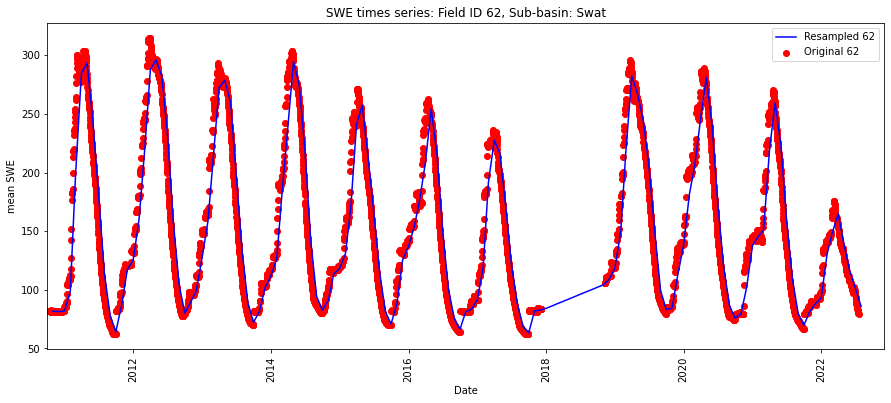

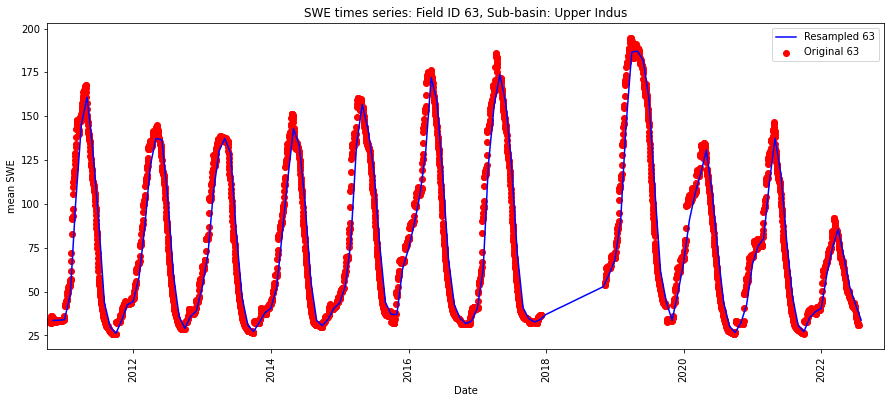

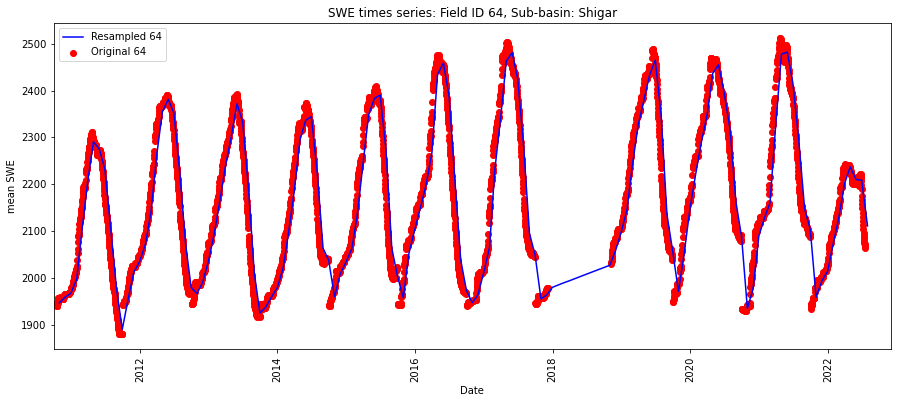

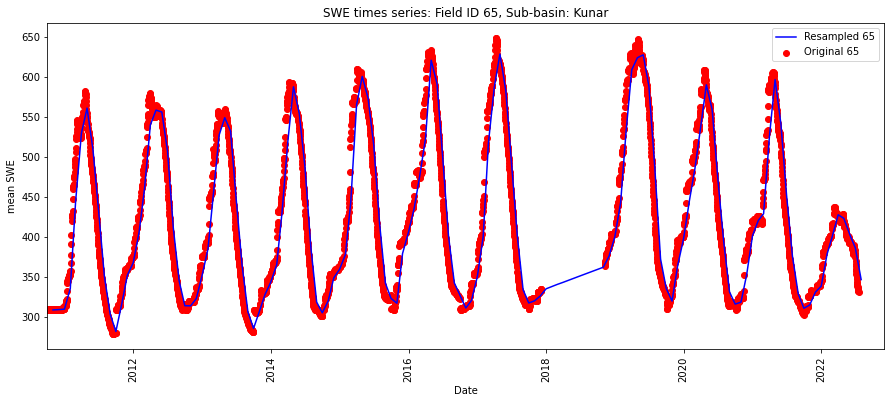

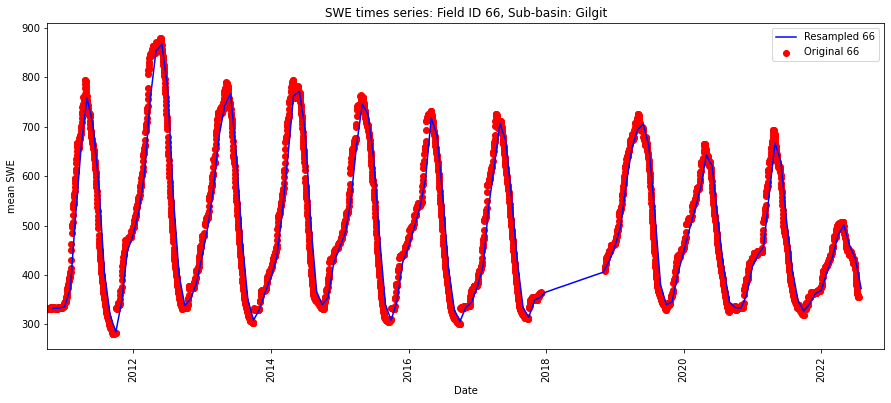

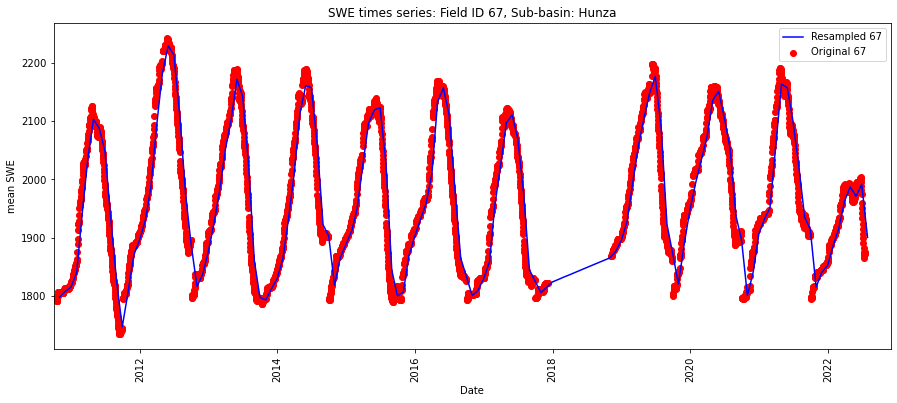

In [223]:
#NOTE: Make sure that the date columns are in numpy datetime format

for i in swe_2011_22:
    df_2011_22 = swe_monthly_stats_2011_2022[swe_monthly_stats_2011_2022['ID'] == i]
    df2_2011_22 = swe_2011_2022[swe_2011_2022['ID'] == i]
    q = df2_2011_22["ID"].unique()
    mpl.rcParams['figure.figsize'] = (15.0, 6.0) 
    
    plt.plot(df_2011_22['Date'], df_2011_22["Mean"], color='blue', label='Resampled {}'.format(i))
    plt.scatter(df2_2011_22['Date'], df2_2011_22["Mean"], color='red', label='Original {}'.format(i))
    
    a = df2_2011_22["L3_Name"].unique()
    
    plt.xlabel('Date')
    plt.xticks(rotation = 90)
    plt.xlim([pd.to_datetime("2010-10-01"), pd.to_datetime("2022-12-01")])
    plt.title('SWE times series: Field ID {}'.format(i) + ', ' + "Sub-basin: " + str(a[0]))
    plt.legend()
    plt.ylabel('mean SWE')
    plt.show()

##### Plots with fixed y-lim

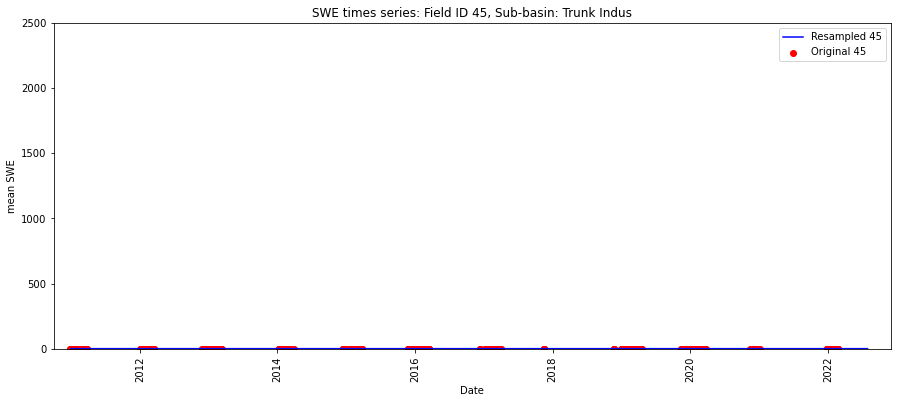

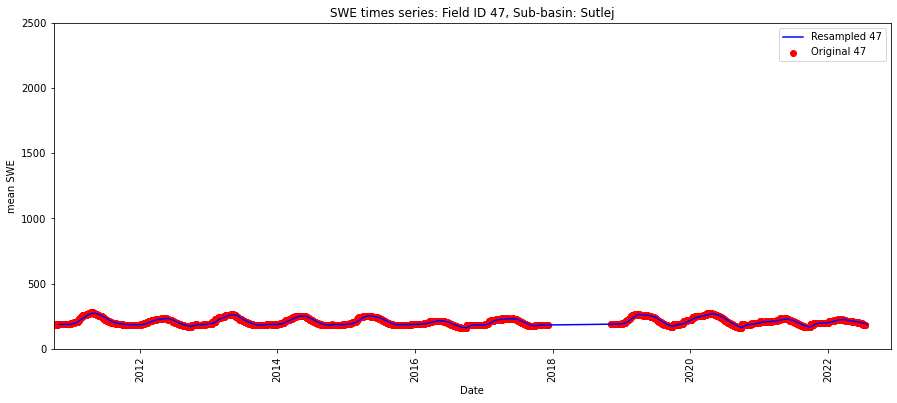

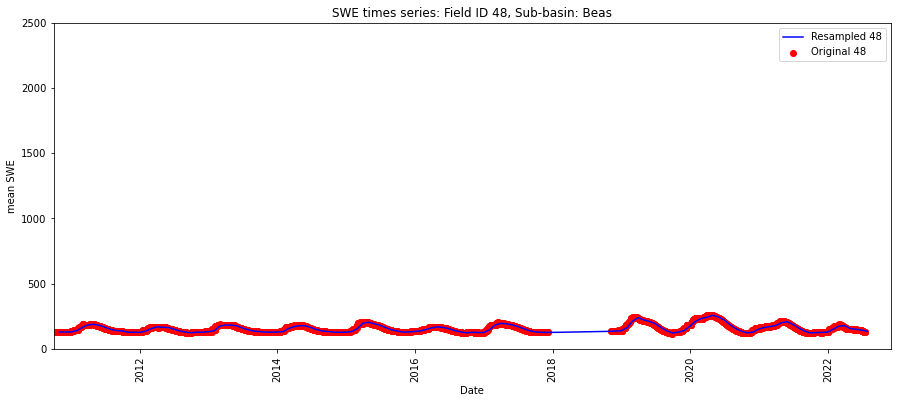

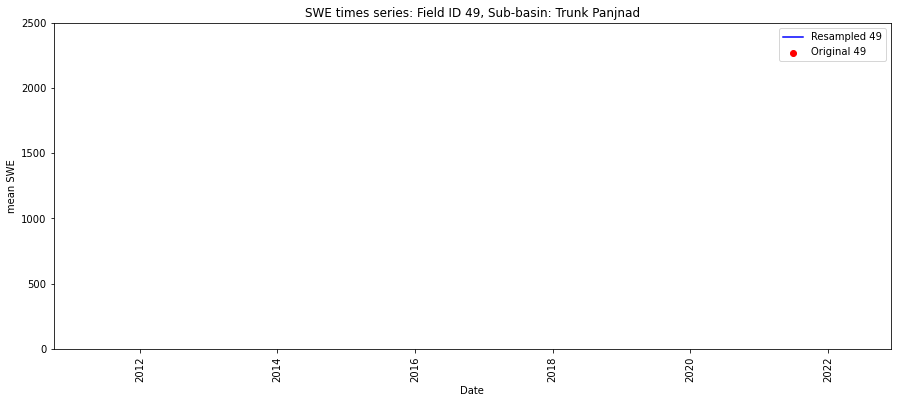

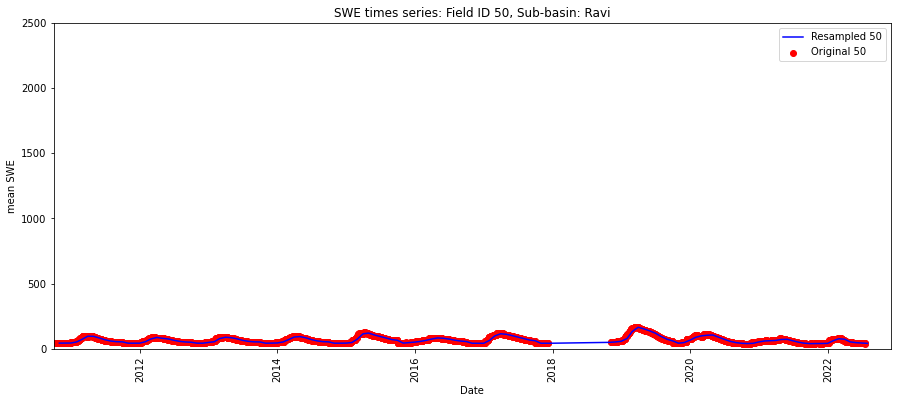

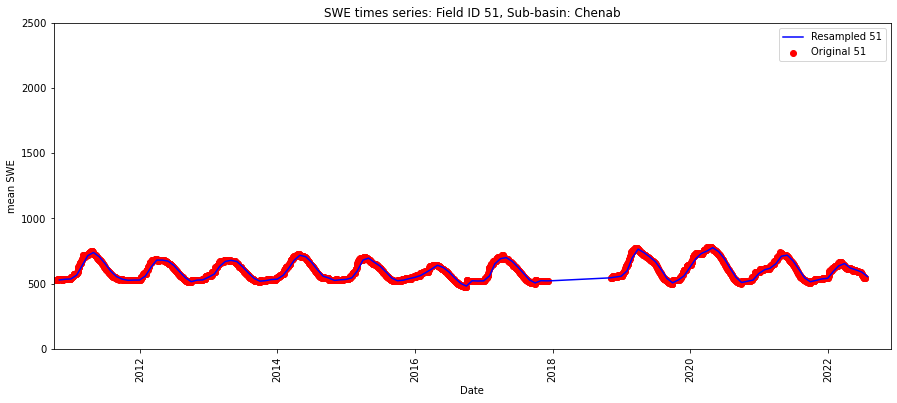

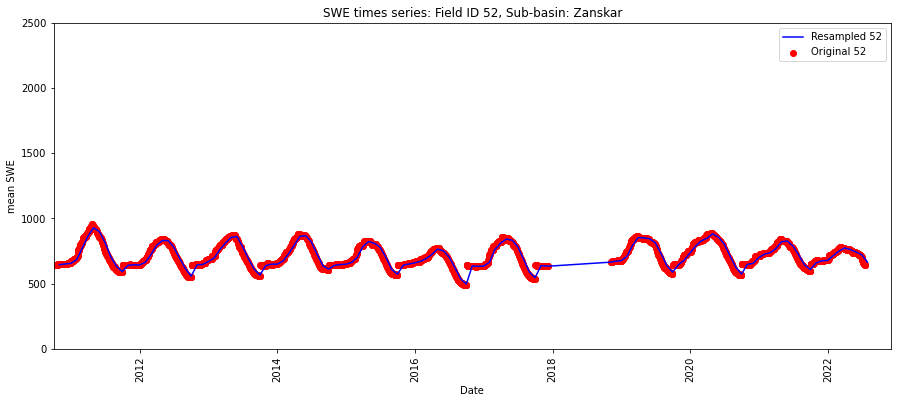

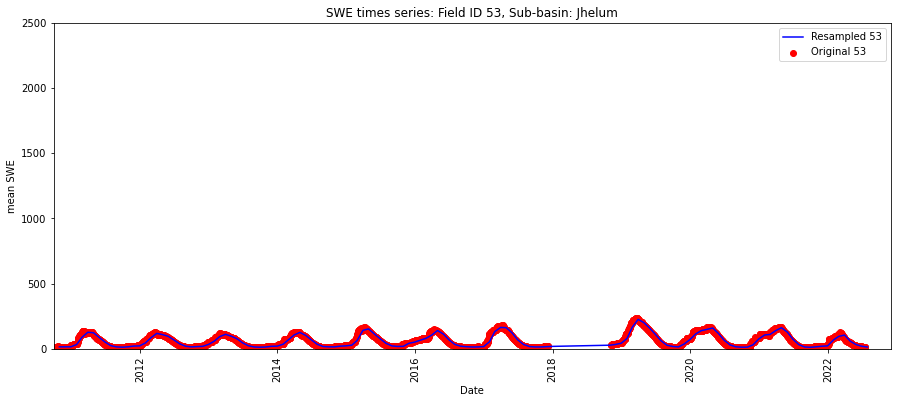

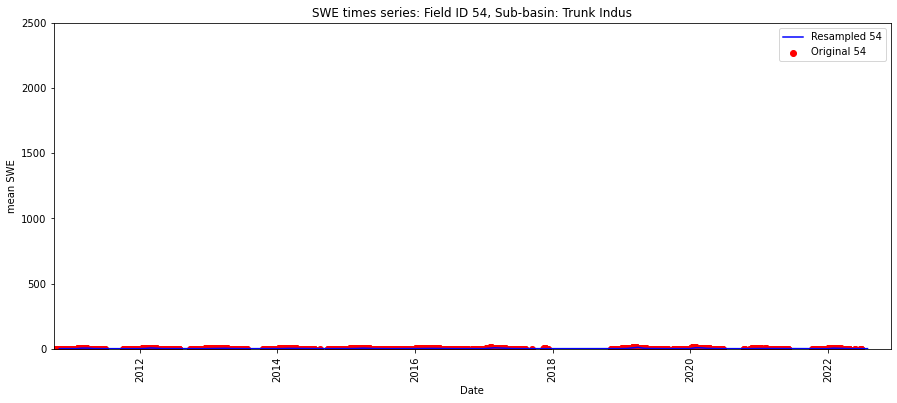

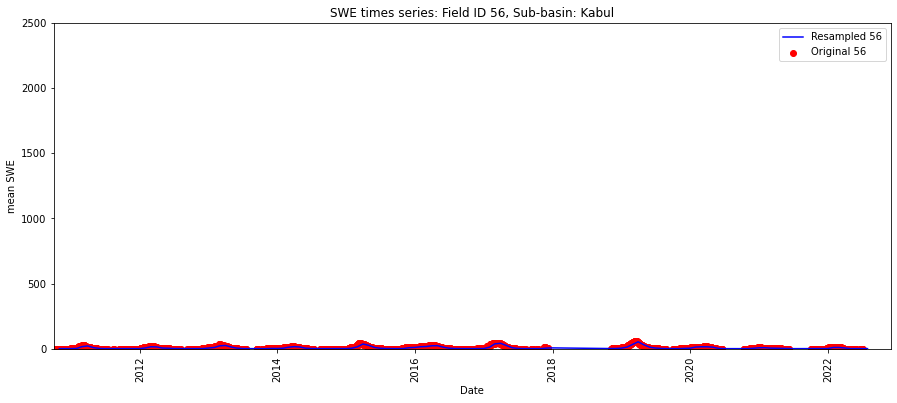

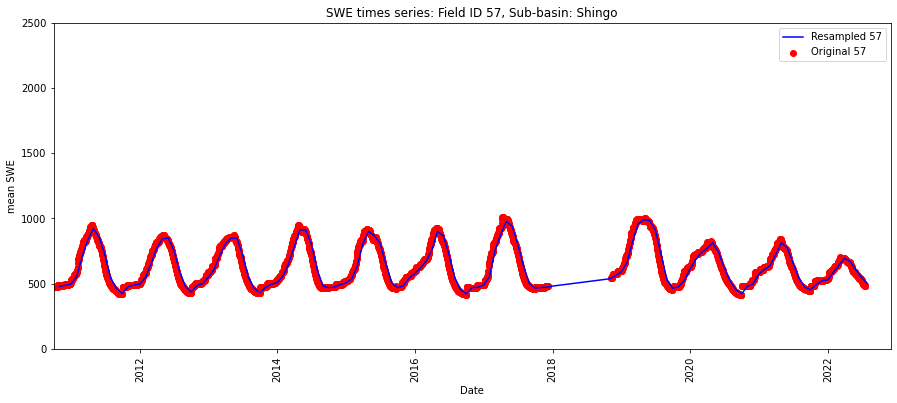

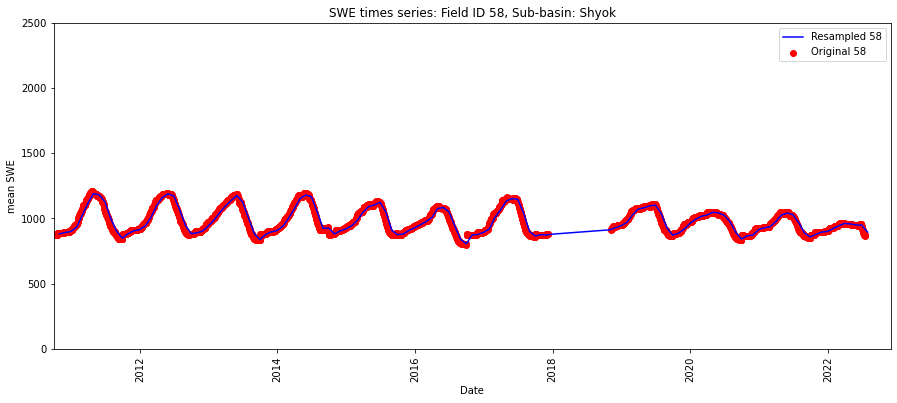

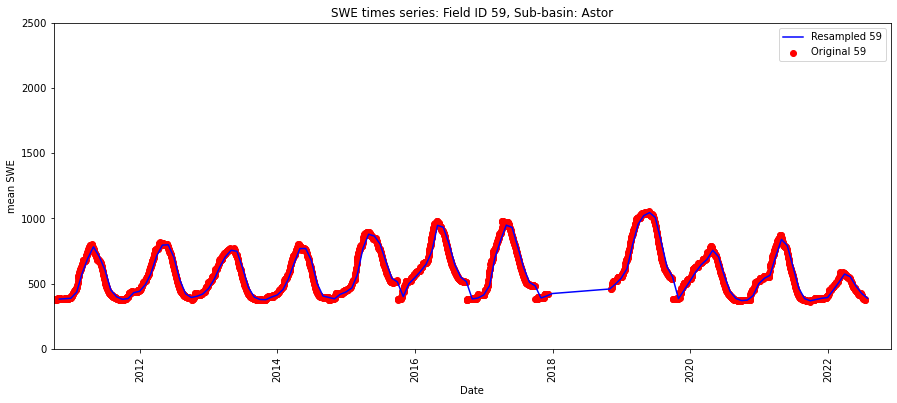

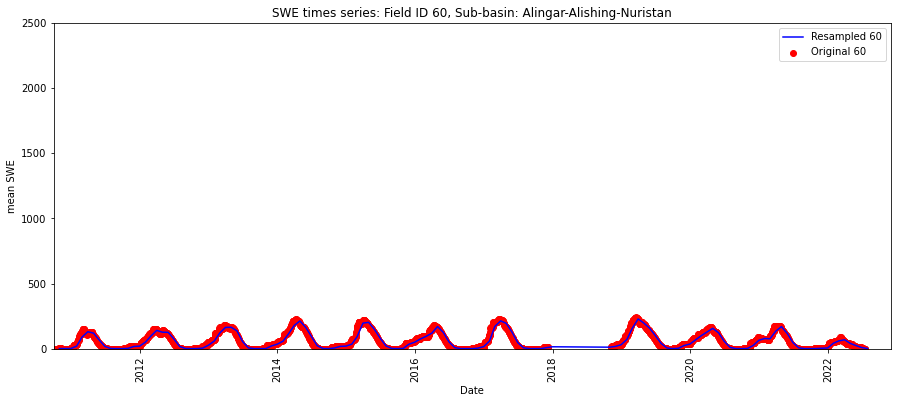

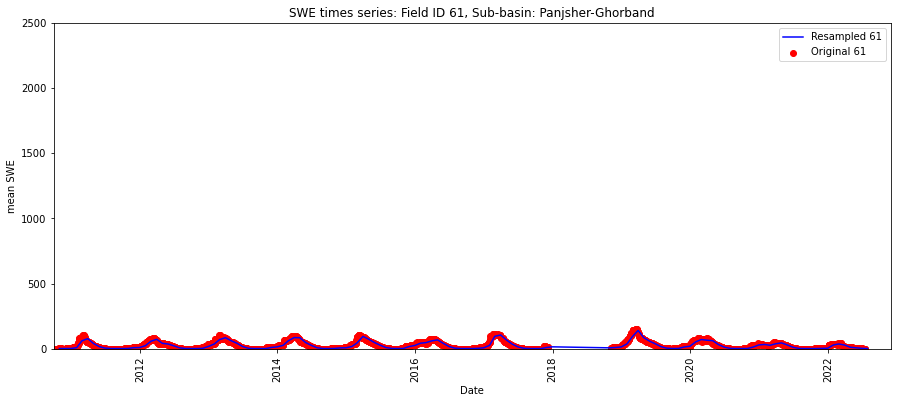

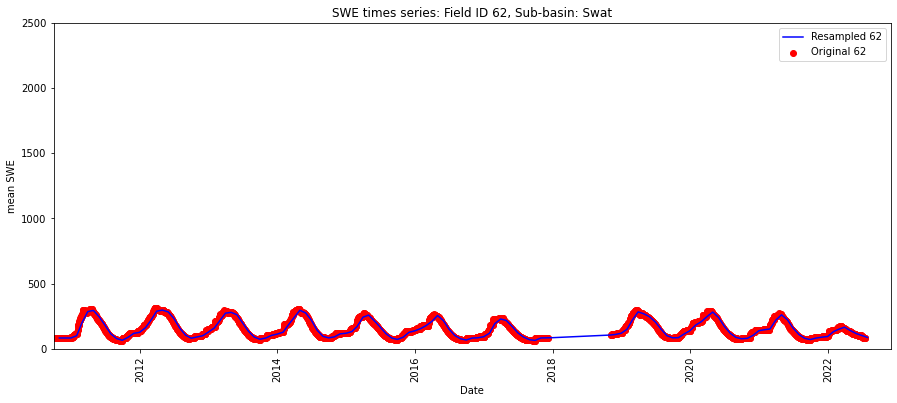

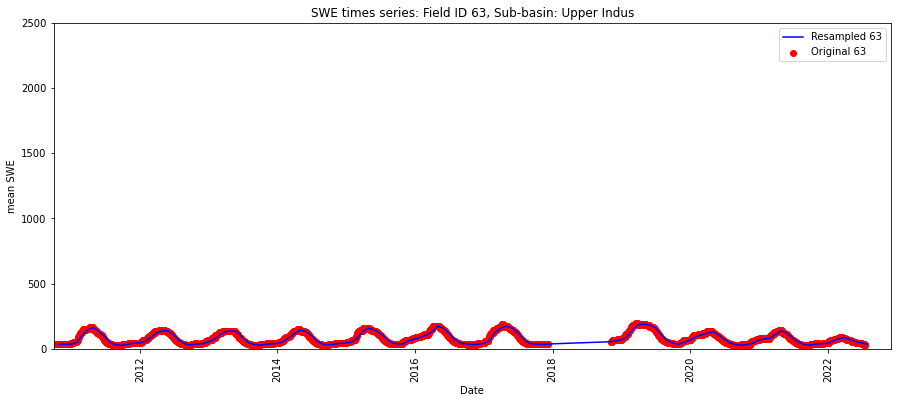

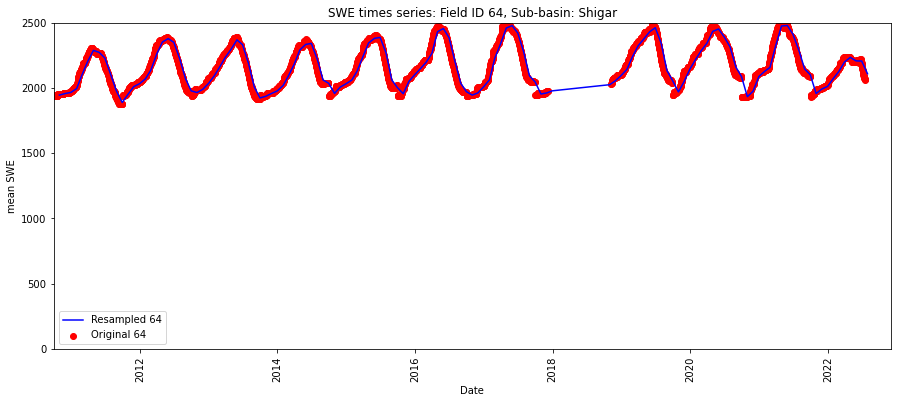

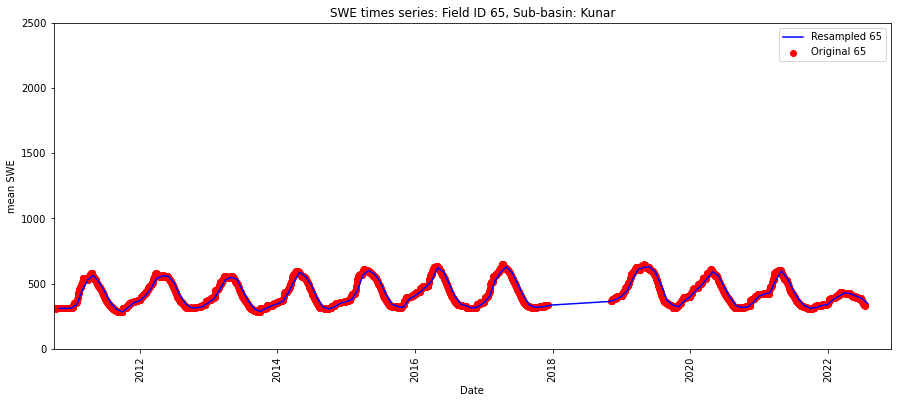

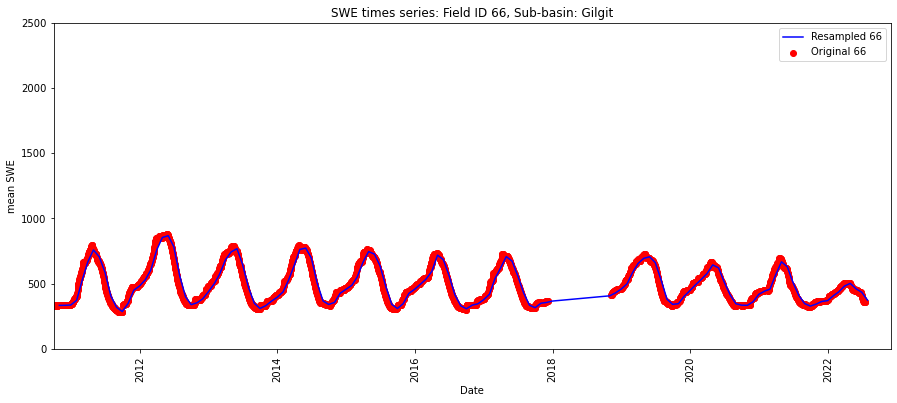

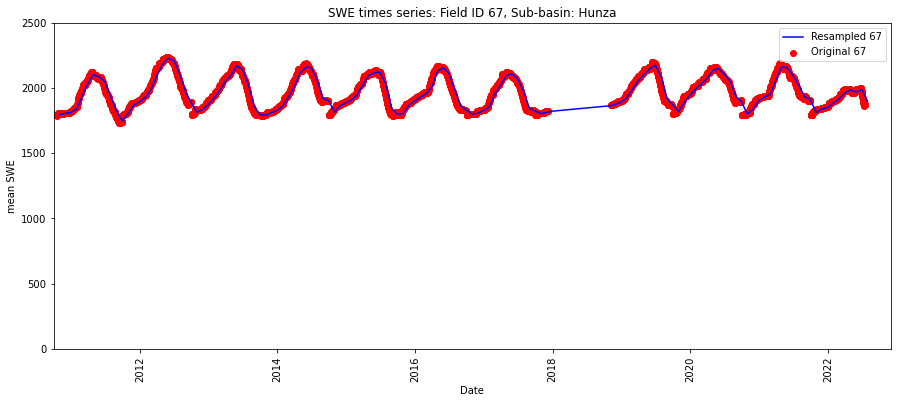

In [119]:
#NOTE: Make sure that the date columns are in numpy datetime format

for i in swe_2011_22:
    df_2011_22 = swe_monthly_stats_2011_2022[swe_monthly_stats_2011_2022['ID'] == i]
    df2_2011_22 = swe_2011_2022[swe_2011_2022['ID'] == i]
    q = df2_2011_22["ID"].unique()
    mpl.rcParams['figure.figsize'] = (15.0, 6.0) 
    
    plt.plot(df_2011_22['Date'], df_2011_22["Mean"], color='blue', label='Resampled {}'.format(i))
    plt.scatter(df2_2011_22['Date'], df2_2011_22["Mean"], color='red', label='Original {}'.format(i))
    
    a = df2_2011_22["L3_Name"].unique()
    
    plt.xlabel('Date')
    plt.xticks(rotation = 90)
    plt.xlim([pd.to_datetime("2010-10-01"), pd.to_datetime("2022-12-01")])
    plt.ylim(-5, 2500)
    plt.title('SWE times series: Field ID {}'.format(i) + ', ' + "Sub-basin: " + str(a[0]))
    plt.legend()
    plt.ylabel('mean SWE')
    plt.show()

#### Testing: Extracting yearly SWE averages from the time series

- Daily SWE times series plotted against the yearly mean SWE for each sub-basin

In [120]:
#method 1: using original time series
swe_2011_2022

ID L1_Name      L2_Name      L3_Name  Mcode        Date  Min       Max  \
0     45   Indus  Trunk Indus  Trunk Indus    NaN  2010-10-02  NaN       NaN   
1     45   Indus  Trunk Indus  Trunk Indus    NaN  2010-10-03  NaN       NaN   
2     45   Indus  Trunk Indus  Trunk Indus    NaN  2010-10-04  NaN       NaN   
3     45   Indus  Trunk Indus  Trunk Indus    NaN  2010-10-05  NaN       NaN   
4     45   Indus  Trunk Indus  Trunk Indus    NaN  2010-10-06  NaN       NaN   
...   ..     ...          ...          ...    ...         ...  ...       ...   
5812  67   Indus  Upper Indus        Hunza  Ind06  2022-07-13  0.0  9667.900   
5813  67   Indus  Upper Indus        Hunza  Ind06  2022-07-14  0.0  9686.264   
5814  67   Indus  Upper Indus        Hunza  Ind06  2022-07-15  0.0  9699.875   
5815  67   Indus  Upper Indus        Hunza  Ind06  2022-07-16  0.0  9699.476   
5816  67   Indus  Upper Indus        Hunza  Ind06  2022-07-17  0.0  9697.950   

          Mean  Median       Std    Count  
0          NaN     NaN       NaN      NaN  
1          NaN     NaN       NaN      NaN  
2          NaN     NaN       NaN      NaN  
3          NaN     NaN       NaN      NaN  
4          NaN     NaN       NaN      NaN  
...        ...     ...       ...      ...  
5812  1865.565  30.355  2709.503  13822.0  
5813  1869.524  31.347  2713.075  13822.0  
5814  1875.209  40.283  2717.438  13822.0  
5815  1874.428  39.492  2718.248  13822.0  
5816  1871.200  30.178  2717.331  13822.0  

[80325 rows x 12 columns]

In [121]:
#Create variables to store string (string that refer to column name(s) in ROI and NDVI Stats dataframe)

date_col = 'start_date'
fid_col = 'ID'

In [126]:
id_array_yearly = []
df_from_start_date_yearly = []


for index, rows in df_indus.iterrows():
    if not pd.isna(rows[date_col]):
        stda = parser.parse(rows[date_col])
    
    df_id_yearly = pd.DataFrame()
    df_id_yearly = swe_2011_2022.query("{}=={}".format(fid_col, int(rows[fid_col])))
    
    if not df_id_yearly.empty:
        df_id_yearly['Date'] = pd.to_datetime(df_id_yearly.loc[:,"Date"])
        df_2 = df_id_yearly.reset_index()
        df_2 = df_2.set_index('Date')
        df_2 = df_2.resample('1D').mean().interpolate()
        
    if not df_2.empty:
        df_id_start = df_2[df_2.index >= stda]
        df_id_start = df_id_start.resample('1Y').mean().interpolate()
    
        df_id_start['DAS'] = df_id_start.index - stda
        df_id_start['MAS'] = (df_id_start.index - stda)/31
        df_id_start['YAS'] = (df_id_start.index - stda)/365
        
        df_id_start['YAS'] = df_id_start['YAS'].dt.days
        df_id_start['MAS'] = df_id_start['MAS'].dt.days
        
        df_from_start_date_yearly.append(df_id_start)
        id_array_yearly.append(int(rows[fid_col]))

C:\Users\sarshrestha\AppData\Local\Temp\ipykernel_16212\3369763719.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_id_yearly['Date'] = pd.to_datetime(df_id_yearly.loc[:,"Date"])
C:\Users\sarshrestha\AppData\Local\Temp\ipykernel_16212\3369763719.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_id_yearly['Date'] = pd.to_datetime(df_id_yearly.loc[:,"Date"])
C:\Users\sarshrestha\AppData\Local\Temp\ipykernel_16212\3369763719.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [127]:
yearly_swe = pd.concat(df_from_start_date_yearly)

In [128]:
yearly_swe = yearly_swe.reset_index()

In [129]:
yearly_swe

Date        index    ID       Min          Max         Mean  \
0   2010-12-31    43.972527  45.0  0.000000    10.767875     0.025375   
1   2011-12-31   175.265753  45.0  0.000000    36.106327     0.015125   
2   2012-12-31   175.239071  45.0  0.000000    14.444873     0.005479   
3   2013-12-31   175.483562  45.0  0.000000     5.276083     0.002737   
4   2014-12-31   175.483562  45.0  0.000000     7.545019     0.004786   
..         ...          ...   ...       ...          ...          ...   
268 2018-12-31  4360.789651  67.0  0.000074  9303.211679  1853.029660   
269 2019-12-31  6655.078082  67.0  0.013215  9928.522396  1995.303074   
270 2020-12-31  7225.933060  67.0  0.037814  9715.584421  1994.071046   
271 2021-12-31  6822.264384  67.0  0.014032  9729.166634  1978.865541   
272 2022-12-31  5722.015152  67.0  0.106879  9475.691280  1948.410455   

         Median          Std          Count       DAS  MAS  YAS  
0      0.000000     0.385500  398867.000000   90 days    2    0  
1      0.000000     0.390683  398867.000000  455 days   14    1  
2      0.000000     0.112629  398867.000000  821 days   26    2  
3      0.000000     0.063911  398867.000000 1186 days   38    3  
4      0.000000     0.112294  398867.000000 1551 days   50    4  
..          ...          ...            ...       ...  ...  ...  
268   70.068935  2665.654831   13821.000000 3012 days   97    8  
269  202.498159  2776.686841   13821.000000 3377 days  108    9  
270  244.792044  2705.075104   13821.251366 3743 days  120   10  
271  225.456029  2705.215149   13822.000000 4108 days  132   11  
272  211.622407  2683.407755   13822.000000 4473 days  144   12  

[273 rows x 12 columns]

##### Plots without fixed y-lim

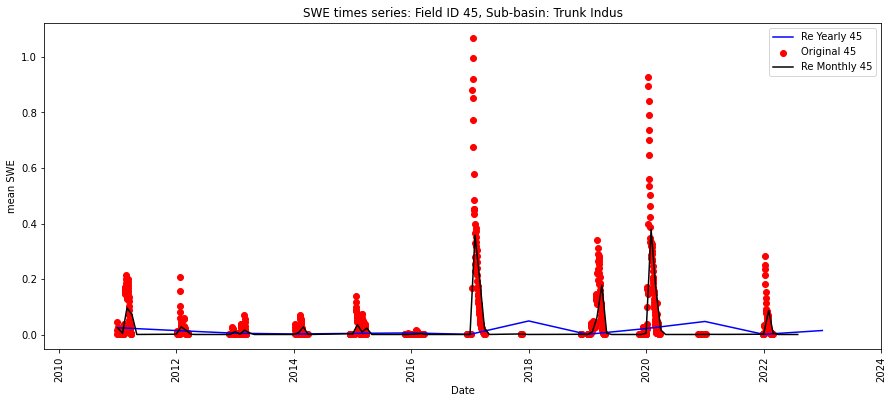

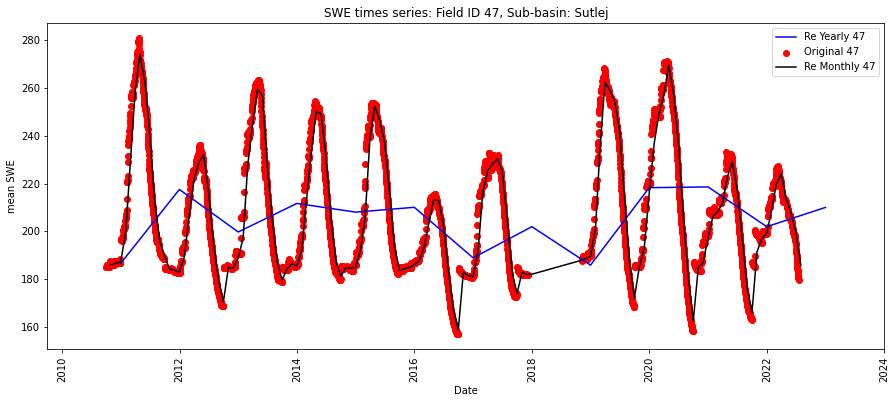

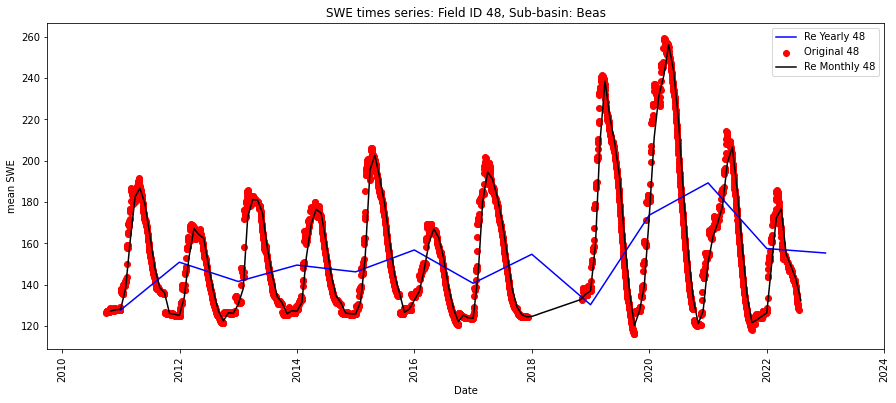

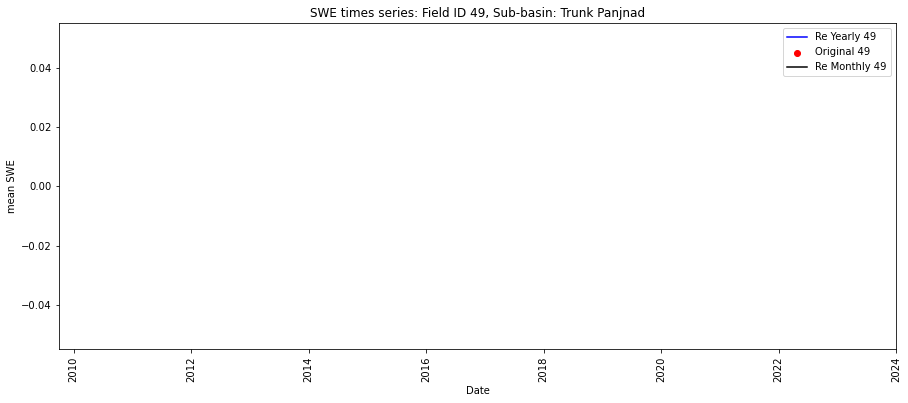

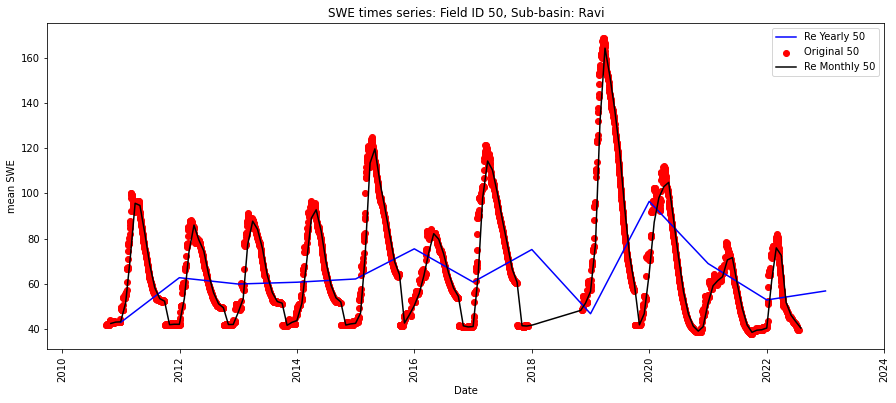

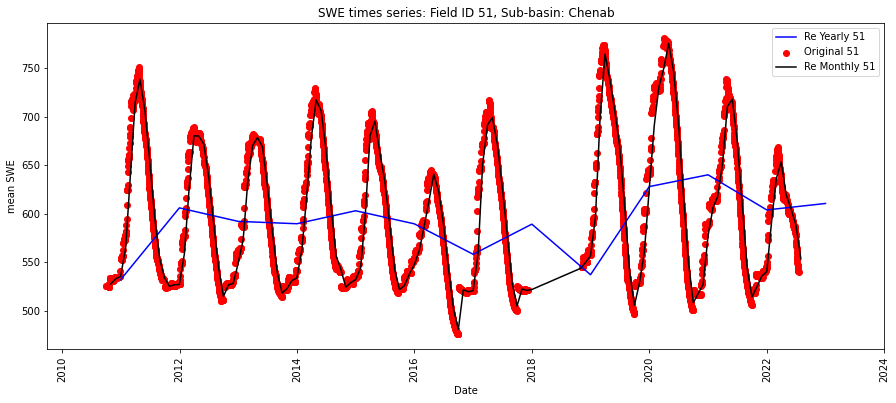

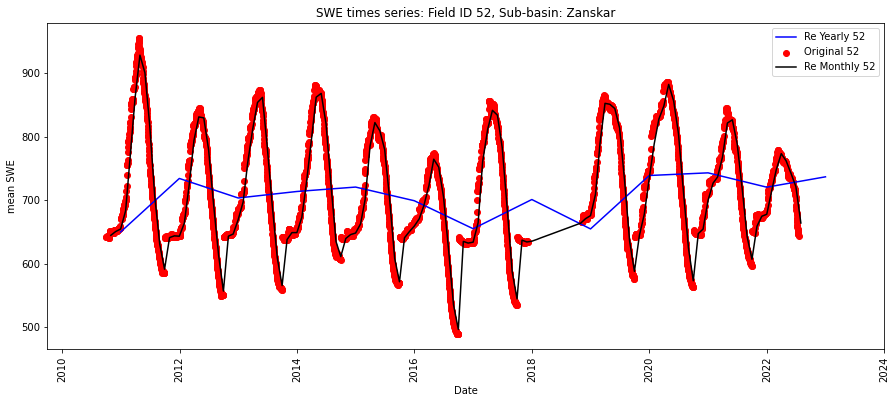

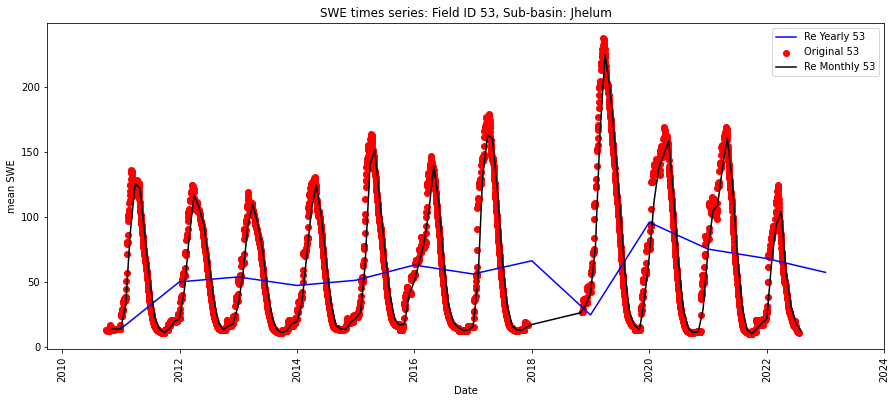

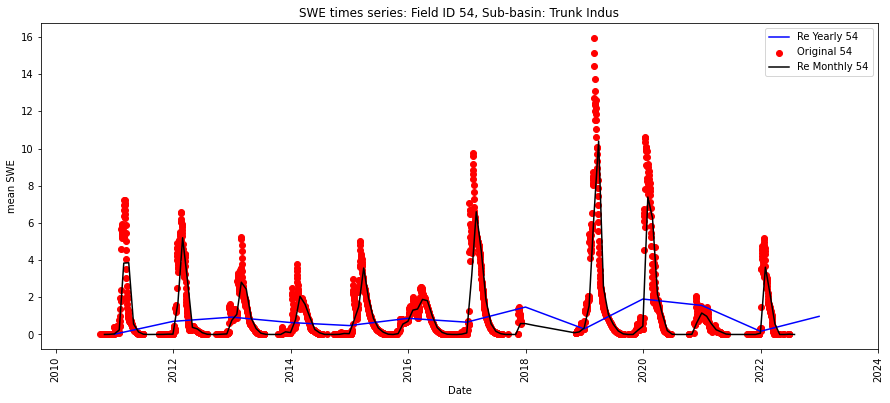

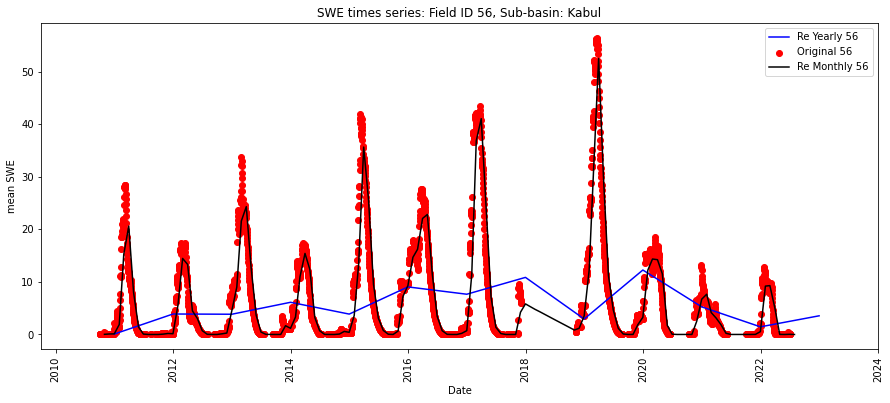

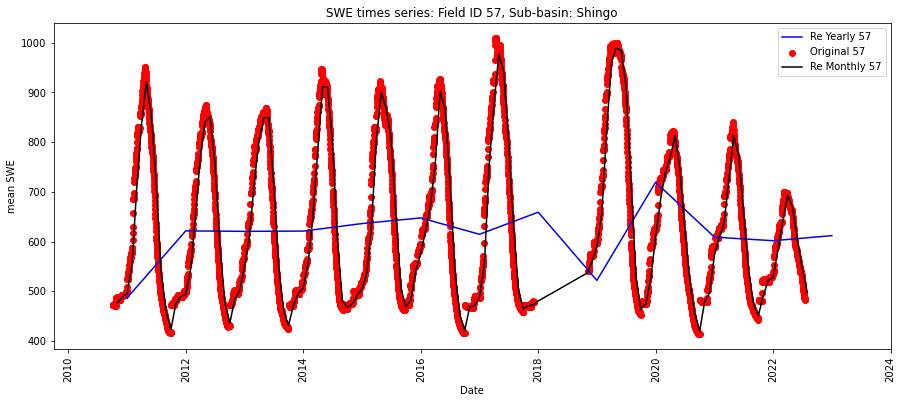

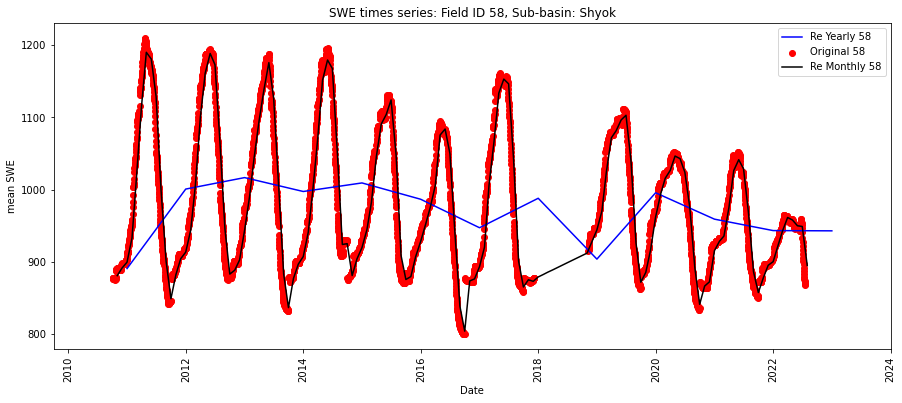

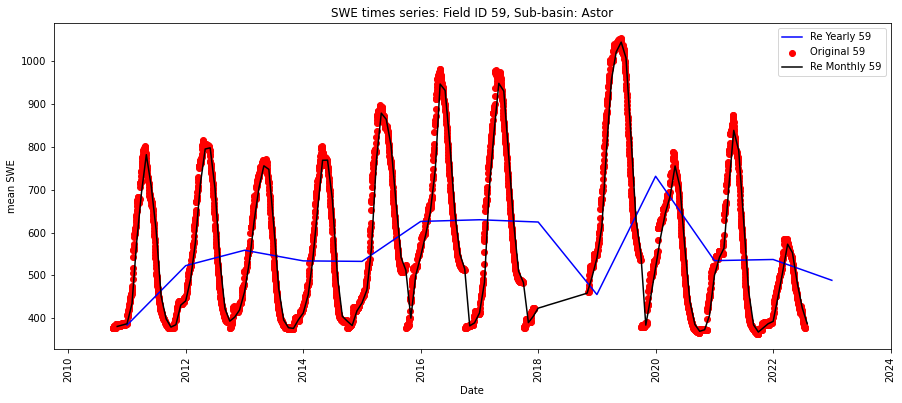

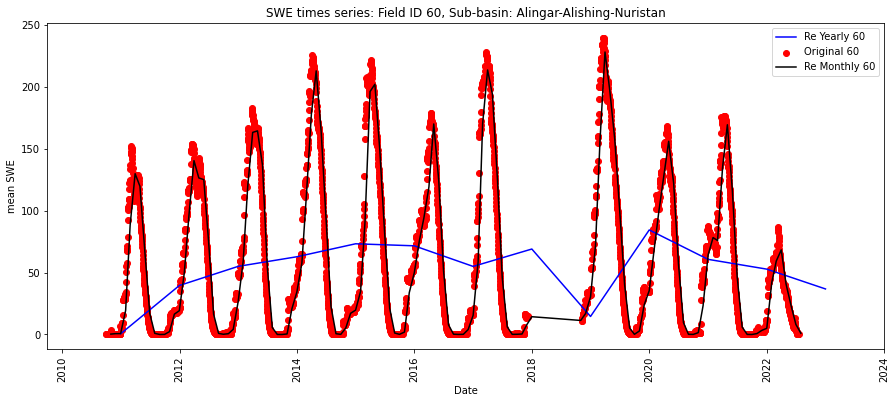

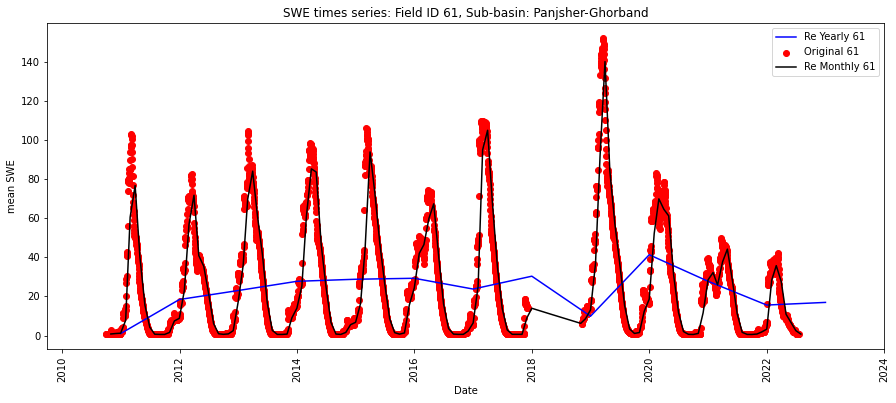

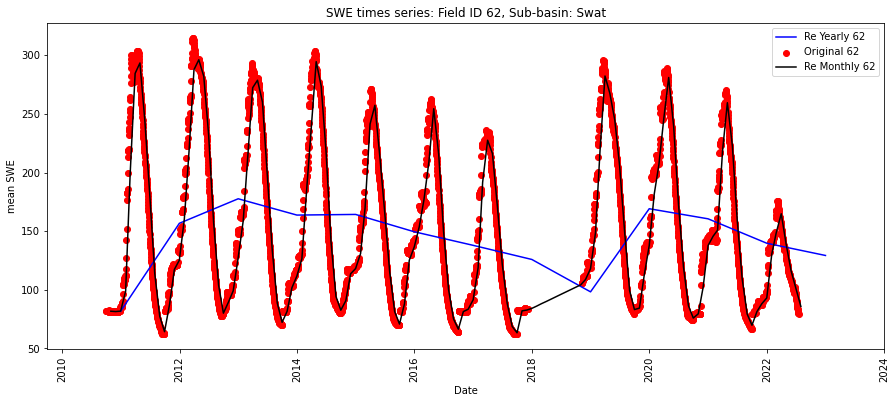

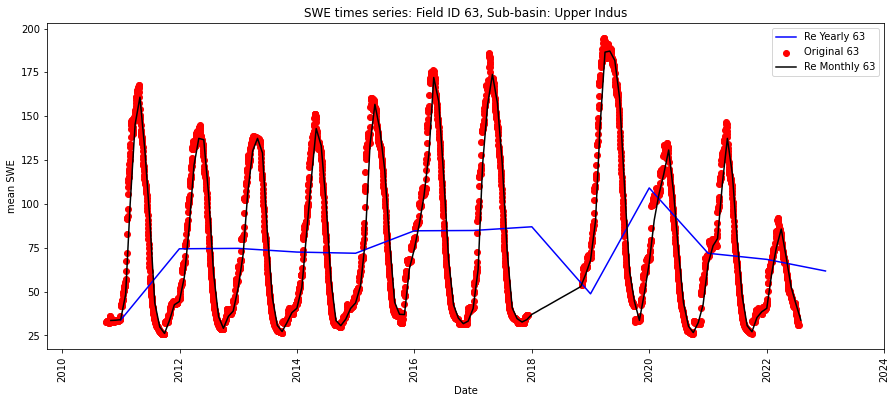

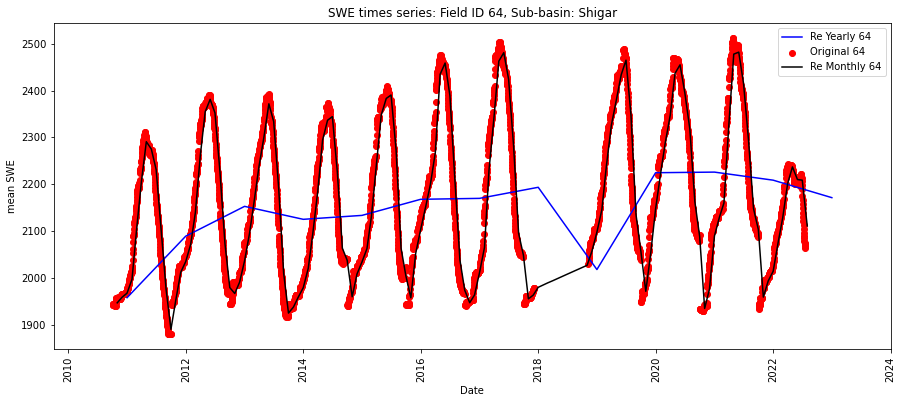

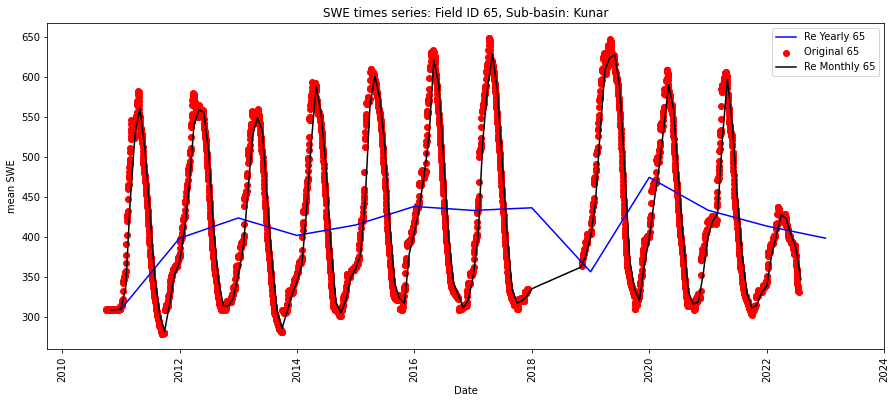

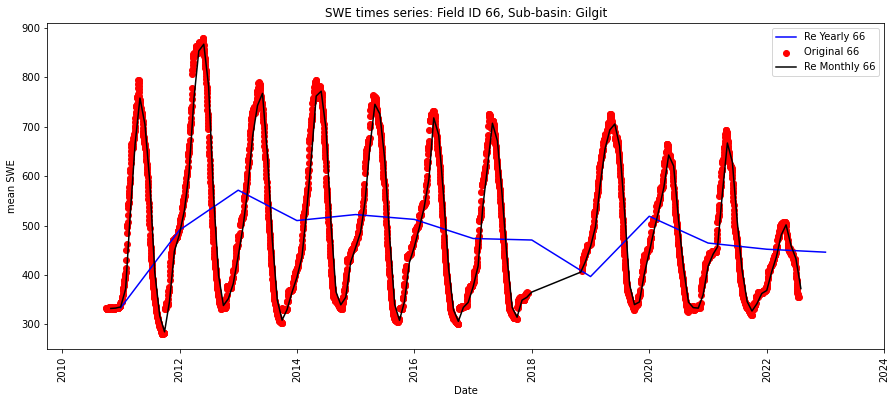

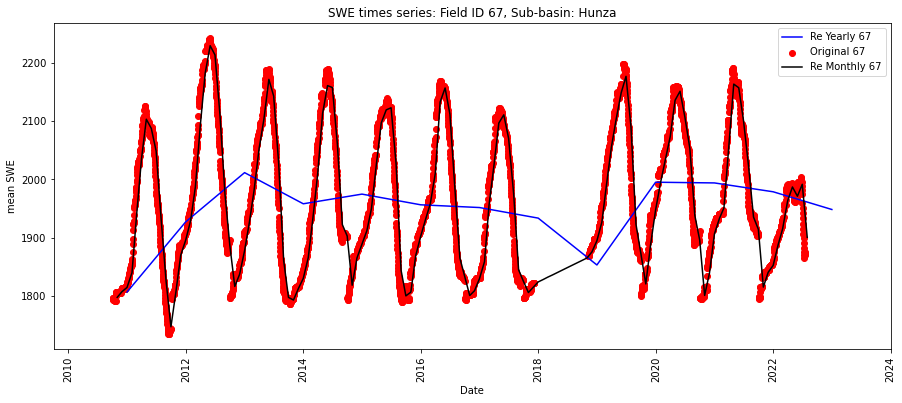

In [252]:
#Plotting the raw and resampled time series for each sub-basin based on their ID

for i in swe_2011_22:
#     print(i)
    dfm = swe_monthly_stats_2011_2022[swe_monthly_stats_2011_2022["ID"] == i]
    df_yearly = yearly_swe[yearly_swe['ID'] == i]
    df2 = swe_2011_2022[swe_2011_2022['ID'] == i]
    
    q = df_yearly["ID"].unique()
    mpl.rcParams['figure.figsize'] = (15.0, 6.0) 
    
    #Yerly
    plt.plot(df_yearly['Date'], df_yearly["Mean"], color='blue', label='Re Yearly {}'.format(i))
    #Daily
    plt.scatter(df2['Date'], df2["Mean"], color='red', label='Original {}'.format(i))
    #monthly
    plt.plot(dfm['Date'], dfm["Mean"], color='black', label='Re Monthly {}'.format(i))
    
    a = df2["L3_Name"].unique()
    
    plt.xlabel('Date')
    plt.xticks(rotation = 90)
    plt.xlim([pd.to_datetime("2009-10-01"), pd.to_datetime("2024-01-01")])
#     plt.ylim([0, 2000])

    plt.title('SWE times series: Field ID {}'.format(i) + ', ' + "Sub-basin: " + str(a[0]))
    
    plt.legend()
    plt.ylabel('mean SWE')
    plt.show()

##### Plots with fixed y-lim

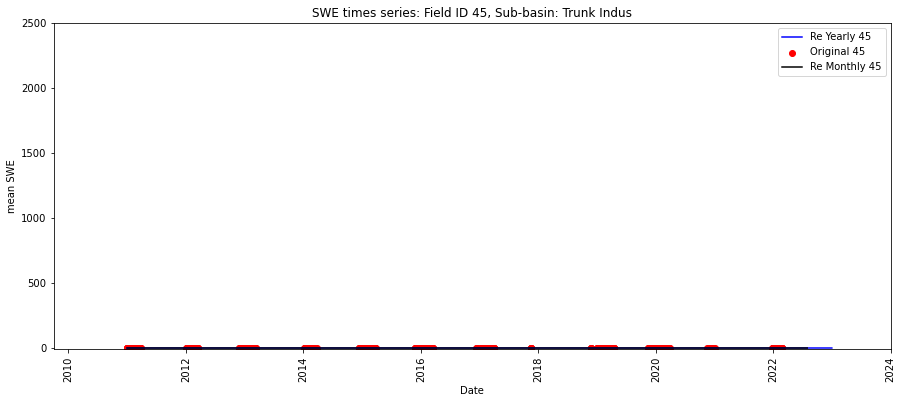

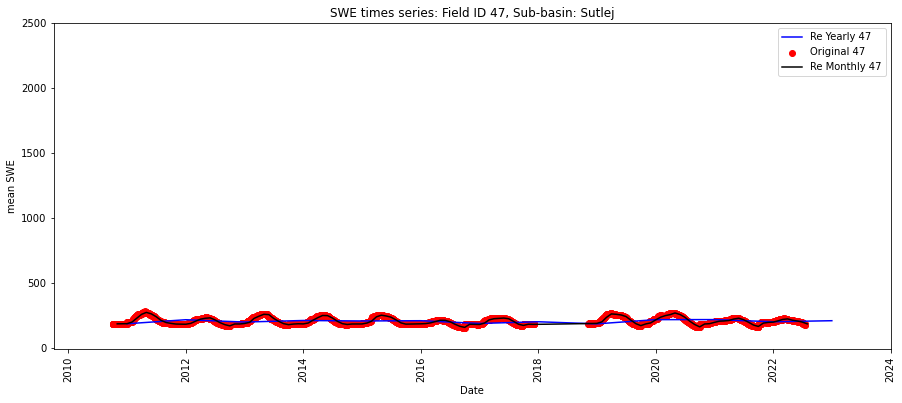

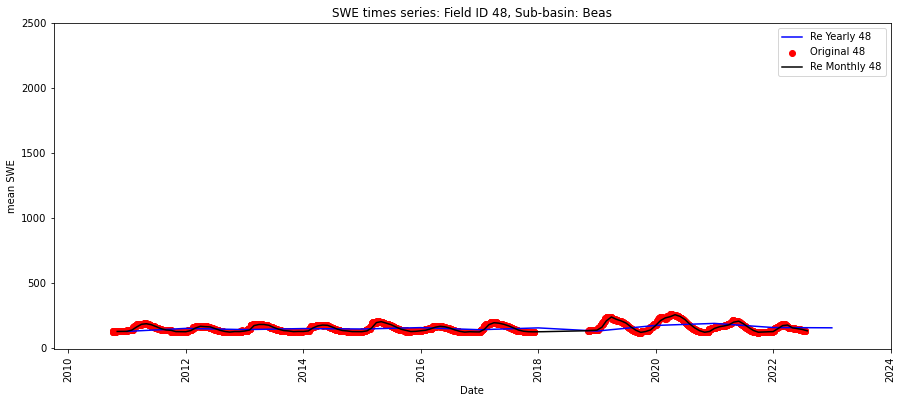

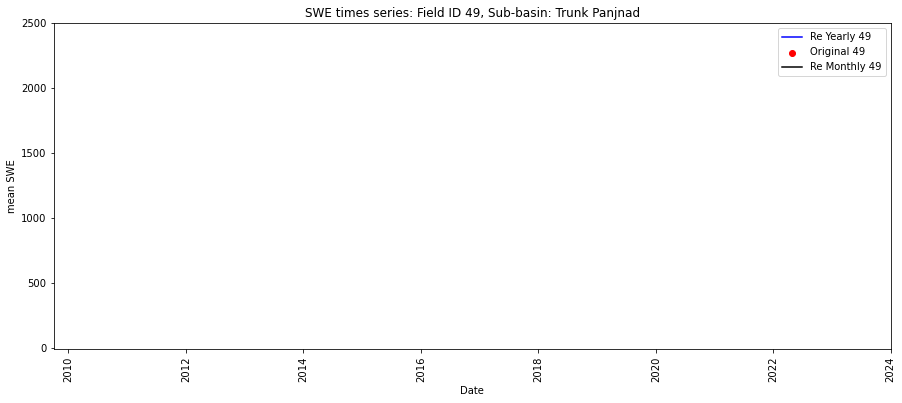

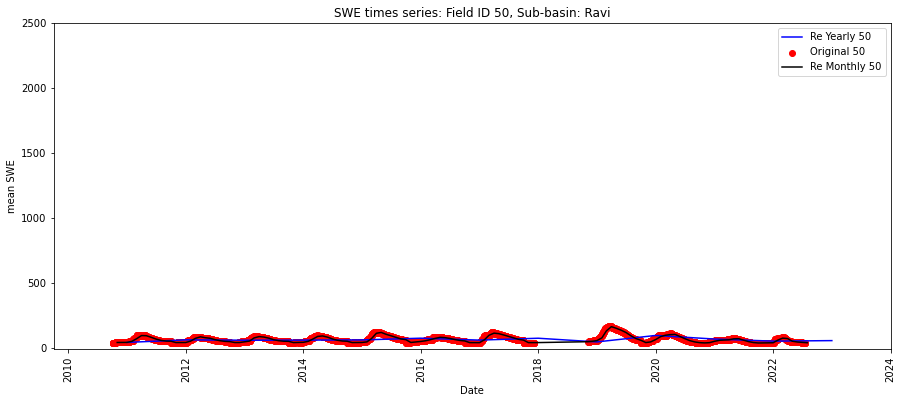

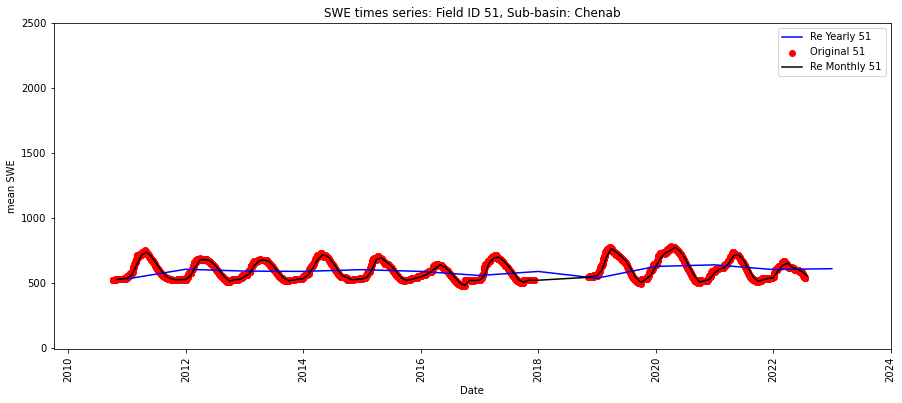

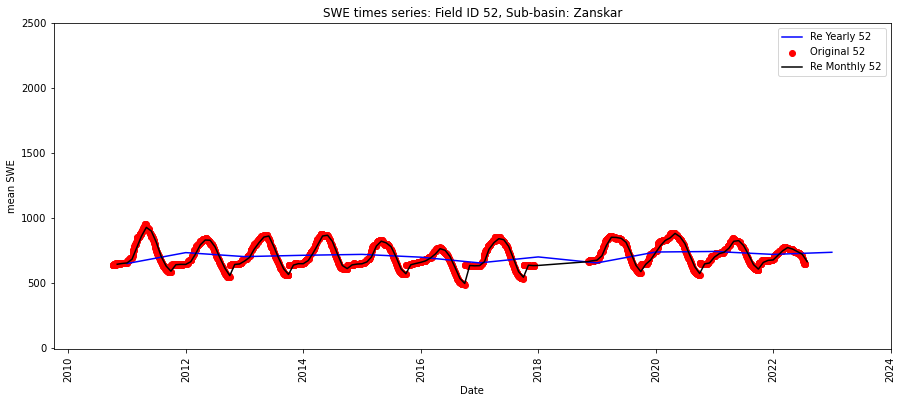

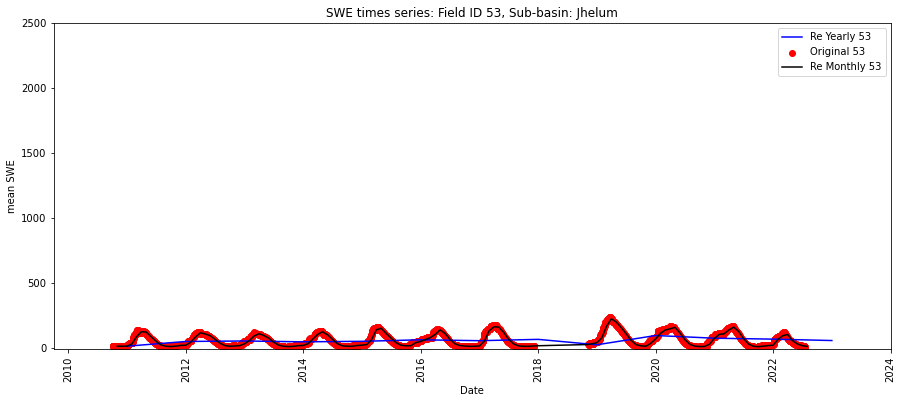

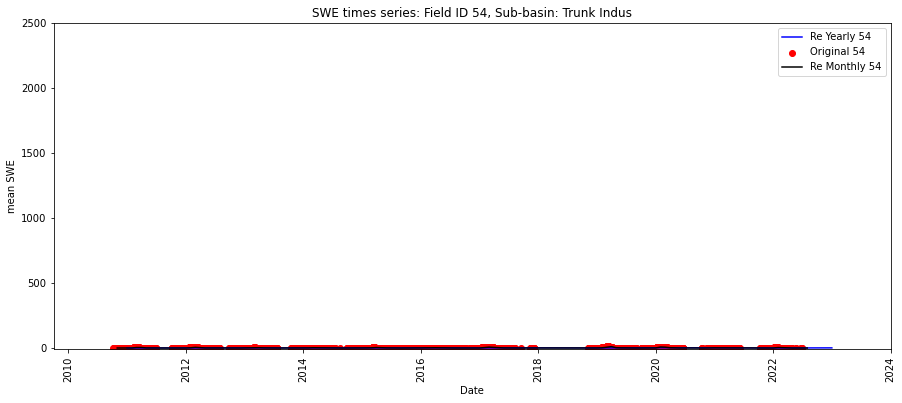

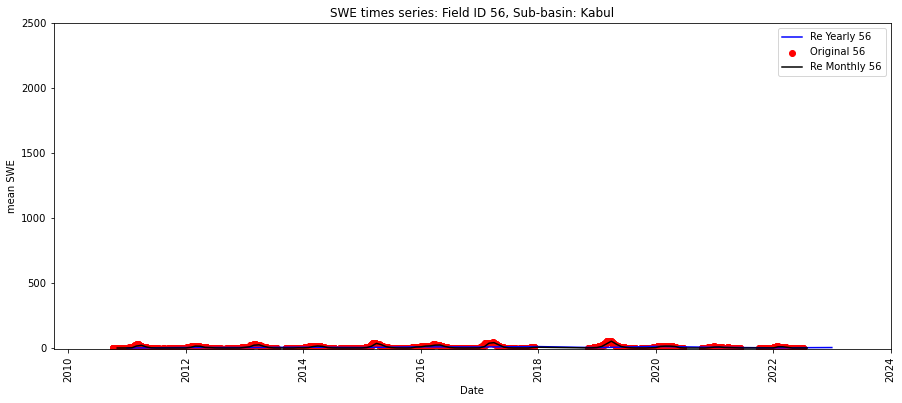

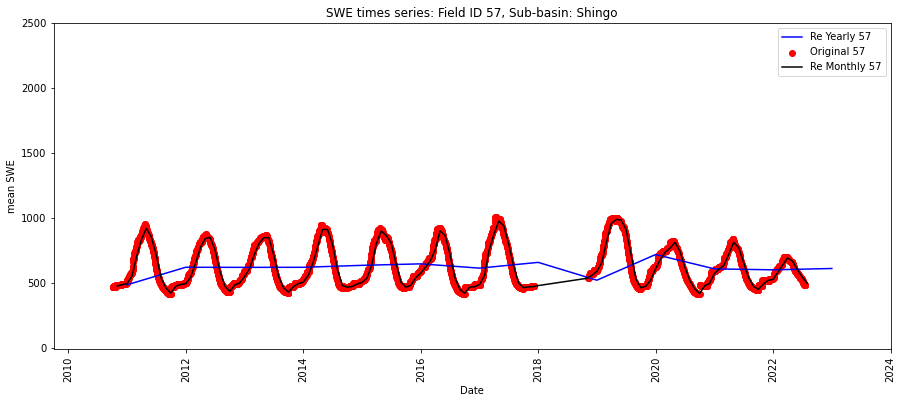

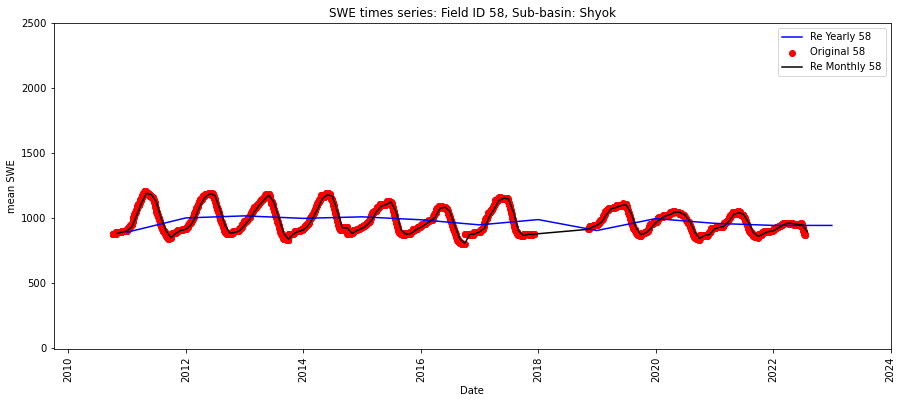

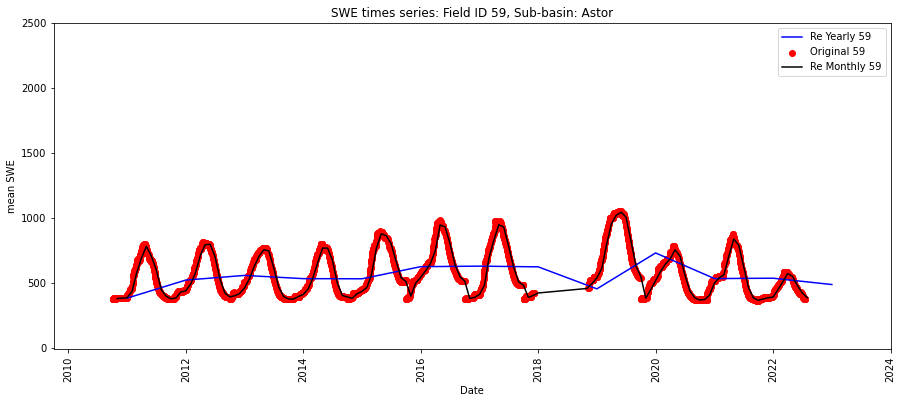

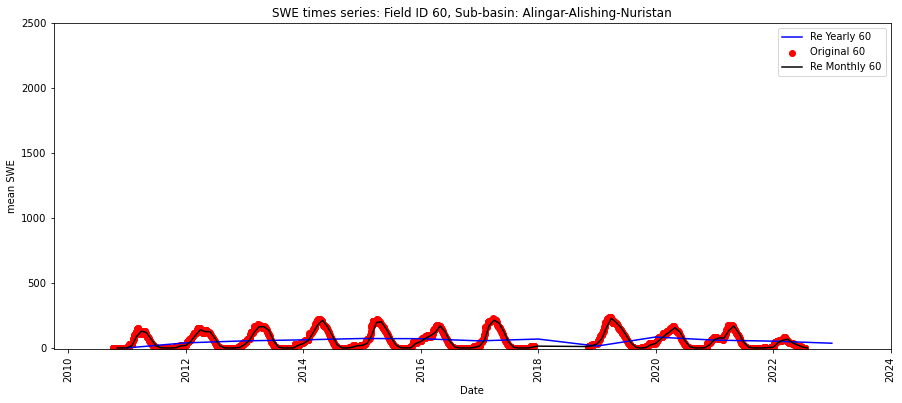

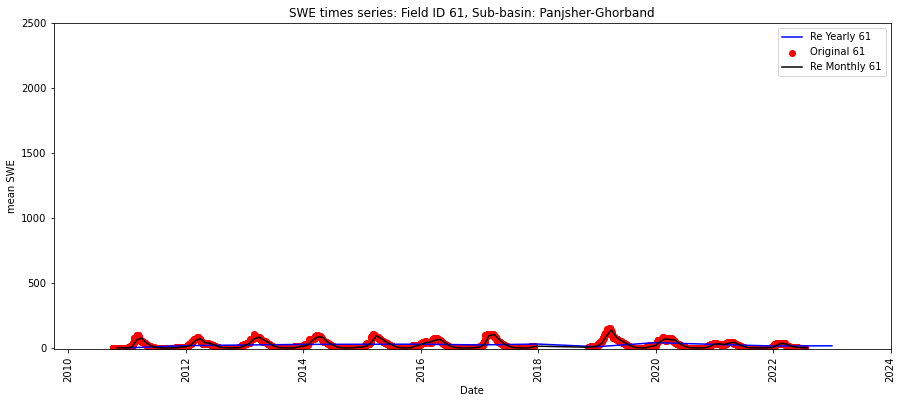

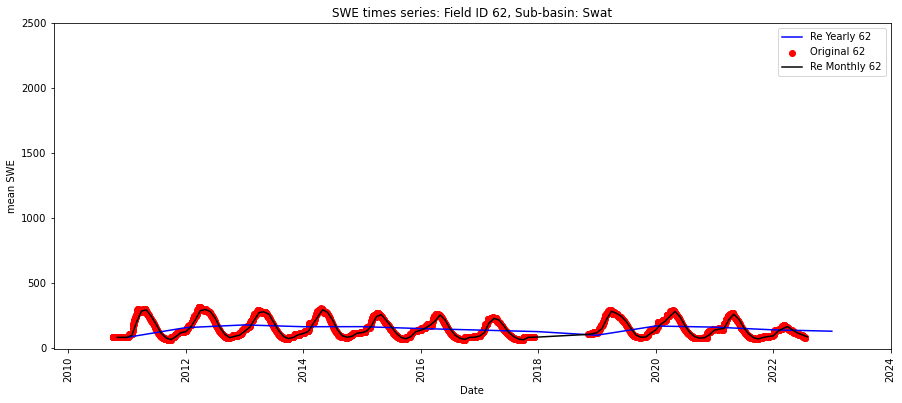

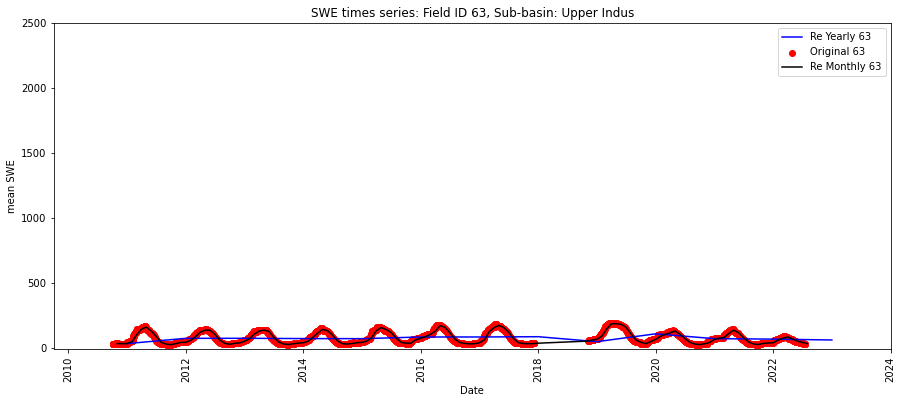

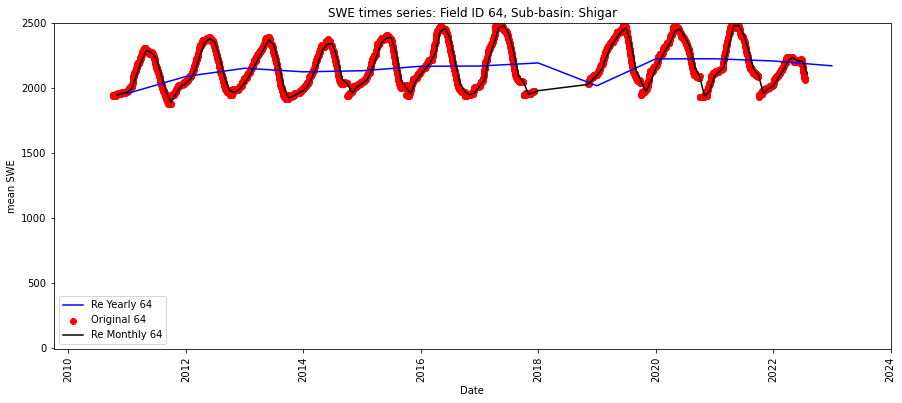

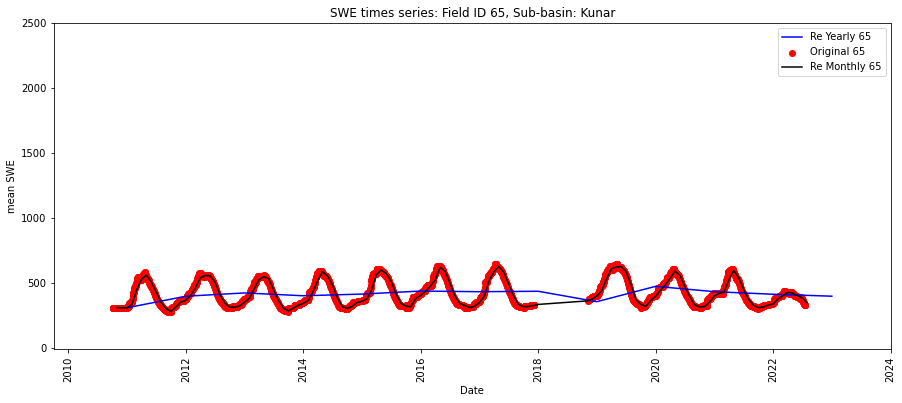

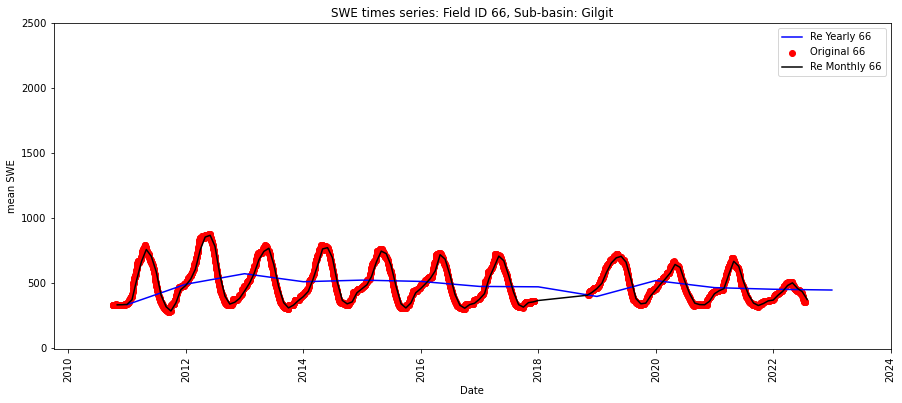

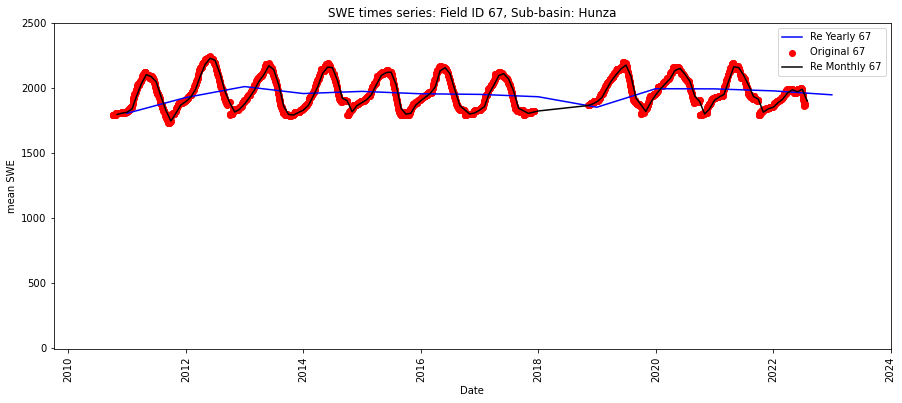

In [132]:
#Plotting

for i in swe_2011_22:
#     print(i)
    dfm = swe_monthly_stats_2011_2022[swe_monthly_stats_2011_2022["ID"] == i]
    df_yearly = yearly_swe[yearly_swe['ID'] == i]
    df2 = swe_2011_2022[swe_2011_2022['ID'] == i]
    
    q = df_yearly["ID"].unique()
    mpl.rcParams['figure.figsize'] = (15.0, 6.0) 
    
    #Yerly
    plt.plot(df_yearly['Date'], df_yearly["Mean"], color='blue', label='Re Yearly {}'.format(i))
    #Daily
    plt.scatter(df2['Date'], df2["Mean"], color='red', label='Original {}'.format(i))
    #monthly
    plt.plot(dfm['Date'], dfm["Mean"], color='black', label='Re Monthly {}'.format(i))
    
    a = df2["L3_Name"].unique()
    
    plt.xlabel('Date')
    plt.xticks(rotation = 90)
    plt.xlim([pd.to_datetime("2009-10-01"), pd.to_datetime("2024-01-01")])
    plt.ylim(-10, 2500)

    plt.title('SWE times series: Field ID {}'.format(i) + ', ' + "Sub-basin: " + str(a[0]))
    
    plt.legend()
    plt.ylabel('mean SWE')
    plt.show()